# Perform Prediction with Nearest Neighbors in Random Walk 
## Robot 
Actuators: Differential drive capable of moving _forward_, _backward_, _right_, _left_ 

Sensors: 100 ray lidar 

## Environment
A bitmap black and white: 

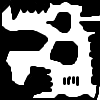

## Dynamics 
The robot performs a random walk, collecting lidar data at each step. This is done in the main program. 

Here we are analysing the results of the data collection. 

### Load Data

In [2]:
from create_parquet import load_data 

In [3]:
path = "output/2025-11-19-081615_uniform_100k_env8"
n = 1_000

parquet_path = load_data(path, n)

[INFO] Using cached parquet: output/2025-11-19-081615_uniform_100k_env8\merged_1000.parquet


In [4]:
import pandas as pd 

data = pd.read_parquet(parquet_path)
data.head()

,step,action,ray_0,ray_1,ray_2,ray_3,ray_4,ray_5,ray_6,ray_7,...,ray_93,ray_94,ray_95,ray_96,ray_97,ray_98,ray_99,x,y,orientation
0,0,1,13.622133,13.622133,11.491845,11.491845,11.491845,11.491845,10.819543,10.819543,...,35.658975,36.312016,32.742366,33.422485,33.422485,32.704166,33.415004,44.75,54.0,0.000000
1,1,1,30.761177,31.468238,17.327723,17.327723,16.650826,15.239751,15.239751,15.239751,...,34.441980,35.089172,34.340210,35.017853,35.017853,34.296501,35.003571,42.50,54.0,0.000000
2,2,1,30.936427,31.647472,32.373793,32.373793,33.114385,33.868311,19.014797,19.014797,...,36.042510,36.688724,35.938315,35.938315,36.613693,33.061496,33.764812,40.25,54.0,0.000000
3,3,1,32.526912,33.241540,33.241540,32.557641,33.301652,34.058773,34.828150,35.608988,...,37.643060,38.288379,34.713110,35.383612,35.383612,34.655447,35.355339,38.00,54.0,0.000000
4,4,2,6.708204,6.708204,8.062258,8.062258,8.062258,9.433981,9.433981,14.422205,...,57.775427,58.180753,58.600341,59.033889,59.481089,59.941638,62.649820,38.00,54.0,343.885562


### Get lidar ray data similar to row 1 data... return top 3 matches

In [5]:
# get data from first row 
row = data.iloc[0]
row

step            0.000000
action          1.000000
ray_0          13.622133
ray_1          13.622133
ray_2          11.491845
                 ...    
ray_98         32.704166
ray_99         33.415004
x              44.750000
y              54.000000
orientation     0.000000
Name: 0, Length: 105, dtype: float64

In [6]:
import numpy as np

N = 10 

ray_cols = [f"ray_{i}" for i in range(100)]

ref = data.loc[1, ray_cols].values

# L2 distance for every row
dists = ((data[ray_cols].values - ref)**2).sum(axis=1)

# indices of the N closest rows (excluding row 1 itself)
topn_idx = np.argsort(dists)[1:10]

data.iloc[topn_idx]


,step,action,ray_0,ray_1,ray_2,ray_3,ray_4,ray_5,ray_6,ray_7,...,ray_93,ray_94,ray_95,ray_96,ray_97,ray_98,ray_99,x,y,orientation
62819,62819,3,20.650036,19.866640,17.692591,17.692591,14.122933,14.122933,14.122933,11.991732,...,36.671717,34.963783,34.121720,33.288398,32.464490,31.650731,31.650731,71.370311,72.587173,262.315408
92442,92442,2,18.593047,16.434663,16.434663,12.885966,12.885966,12.885966,12.885966,10.790961,...,34.482242,33.670978,32.870115,32.080433,31.302778,30.538069,30.538069,70.078247,72.145138,266.134498
9329,9329,3,38.558764,38.966075,19.271743,18.373985,18.373985,17.487327,16.613545,16.613545,...,36.530711,36.530711,36.887615,37.267941,37.267941,37.670979,37.670979,54.601634,32.711639,69.274807
9339,9339,2,38.558764,38.966075,19.271743,18.373985,18.373985,17.487327,16.613545,16.613545,...,36.530711,36.530711,36.887615,37.267941,37.267941,37.670979,37.670979,54.601634,32.711639,69.274807
1986,1986,1,25.402259,24.623909,22.451269,22.451269,22.451269,21.705337,21.705337,20.980557,...,36.120964,35.274953,34.437198,33.608316,33.608316,32.788980,31.979924,70.968926,74.700851,263.313372
1988,1988,3,25.402259,24.623909,22.451269,22.451269,22.451269,21.705337,21.705337,20.980557,...,36.120964,35.274953,34.437198,33.608316,33.608316,32.788980,31.979924,70.968926,74.700851,263.313372
1985,1985,1,25.402259,24.623909,22.451269,22.451269,22.451269,21.705337,21.705337,20.980557,...,36.120964,35.274953,34.437198,33.608316,33.608316,32.788980,31.979924,70.968926,74.700851,263.313372
1982,1982,1,25.402259,24.623909,22.451269,22.451269,22.451269,21.705337,21.705337,20.980557,...,36.120964,35.274953,34.437198,33.608316,33.608316,32.788980,31.979924,70.968926,74.700851,263.313372
1983,1983,1,25.402259,24.623909,22.451269,22.451269,22.451269,21.705337,21.705337,20.980557,...,36.120964,35.274953,34.437198,33.608316,33.608316,32.788980,31.979924,70.968926,74.700851,263.313372


### Plot Query and Top Matches 

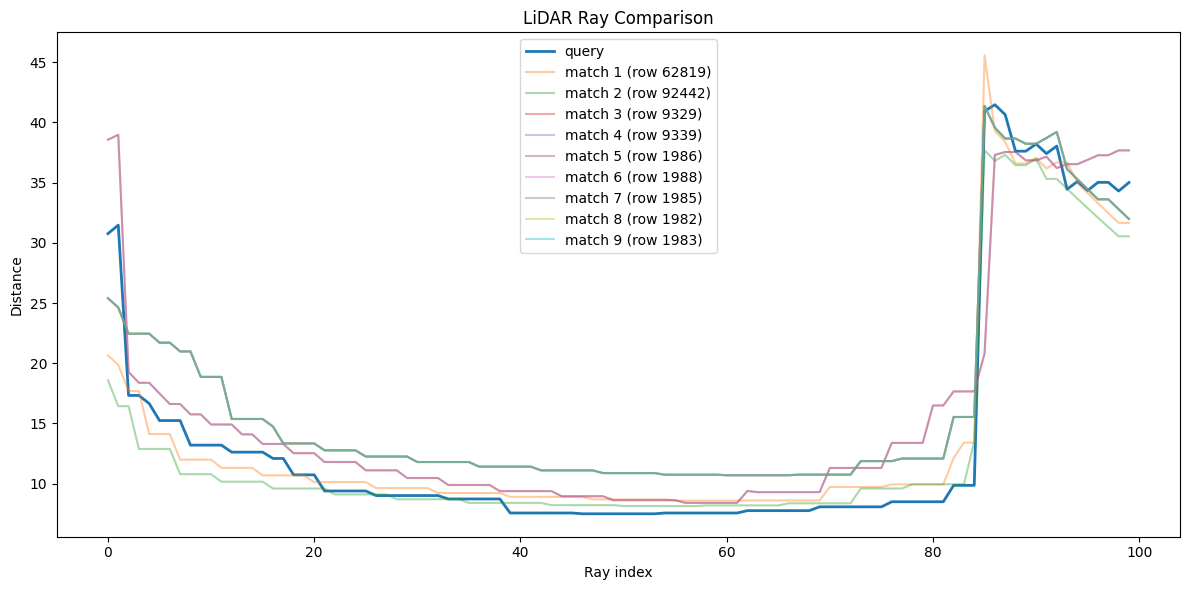

In [7]:
import matplotlib.pyplot as plt

# Plot query + matches
plt.figure(figsize=(12, 6))

# Query
plt.plot(ref, label="query", linewidth=2)

# Matches
for i, idx in enumerate(topn_idx):
    plt.plot(data.loc[idx, ray_cols].values, label=f"match {i+1} (row {idx})", alpha=0.4)

plt.title("LiDAR Ray Comparison")
plt.xlabel("Ray index")
plt.ylabel("Distance")
plt.legend()
plt.tight_layout()
plt.show()


### Try to Predict
Use next readings of nearest match to predict the next reading to our query row (if query row is 0, we want to predict row 1)

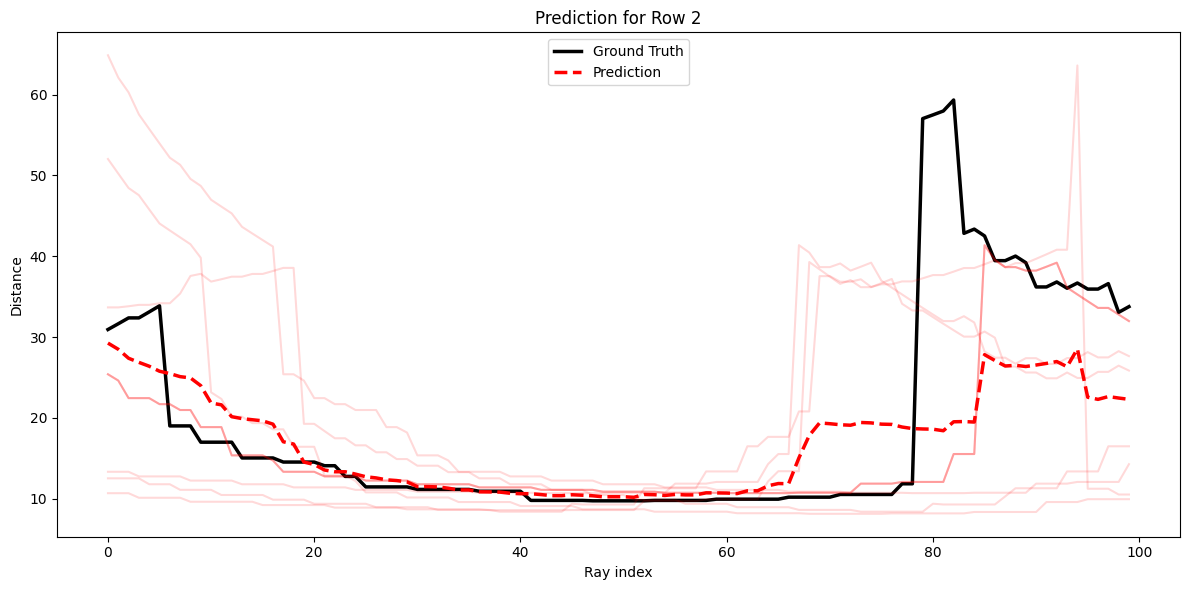

MSE: 106.9300, MAE: 5.9876


In [8]:
# Target indices 
query_idx = 1
target_idx = query_idx + 1

# Neighbor "next" scans
neighbor_next = [i + 1 for i in topn_idx if i + 1 < len(data)]
neighbor_futures = data.loc[neighbor_next, ray_cols].values

# Prediction & Ground Truth
predicted_scan = neighbor_futures.mean(axis=0)
ground_truth = data.loc[target_idx, ray_cols].values

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ground_truth, 'k', lw=2.5, label="Ground Truth")
plt.plot(predicted_scan, 'r--', lw=2.5, label="Prediction")
[plt.plot(fut, 'r', alpha=0.15) for fut in neighbor_futures]
plt.title(f"Prediction for Row {target_idx}")
plt.xlabel("Ray index"); plt.ylabel("Distance")
plt.legend(); plt.tight_layout(); plt.show()

# Error
mse = ((ground_truth - predicted_scan)**2).mean()
mae = np.abs(ground_truth - predicted_scan).mean()
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}")


### Repeat Process with Action Filtered Values 

In [9]:
# %% [markdown]
# ### Filter by Action and Find Nearest Neighbors

# %% 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
query_idx = 1
top_N = 10
ray_cols = [f"ray_{i}" for i in range(100)]

# Query data
query_row = data.loc[query_idx]
query_action = query_row['action']
query_ref = query_row[ray_cols].values

# Filter rows with same action, exclude query row itself
mask = (data['action'] == query_action) & (data.index != query_idx)
candidates = data.loc[mask, ray_cols].values

# Compute L2 distances
dists = np.sum((candidates - query_ref) ** 2, axis=1)

# Get top N nearest neighbors
candidate_indices = data.index[mask]
topn_idx = candidate_indices[np.argsort(dists)[:top_N]]
topn_idx

Index([1986, 1982, 1983, 1984, 1985, 18343, 82708, 67405, 60801, 60800], dtype='int64')

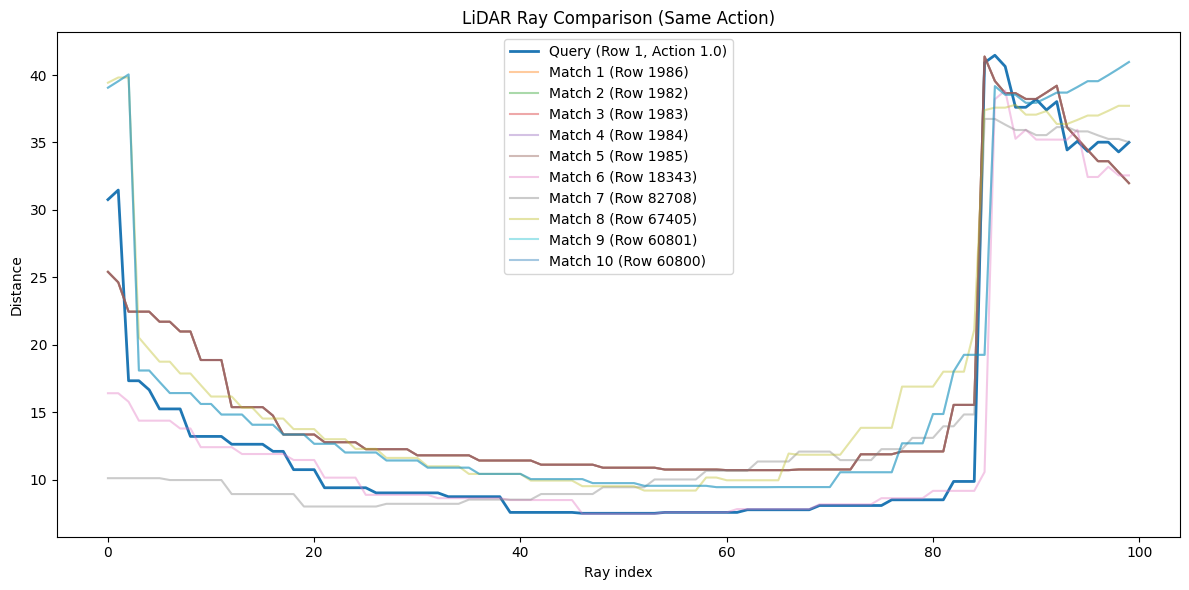

In [10]:
# %% [markdown]
# ### Plot Query and Top Matches (Same Action)

# %%
plt.figure(figsize=(12, 6))
plt.plot(query_ref, label=f"Query (Row {query_idx}, Action {query_action})", lw=2)

for i, idx in enumerate(topn_idx):
    plt.plot(data.loc[idx, ray_cols].values, alpha=0.4, label=f"Match {i+1} (Row {idx})")

plt.title("LiDAR Ray Comparison (Same Action)")
plt.xlabel("Ray index")
plt.ylabel("Distance")
plt.legend()
plt.tight_layout()
plt.show()


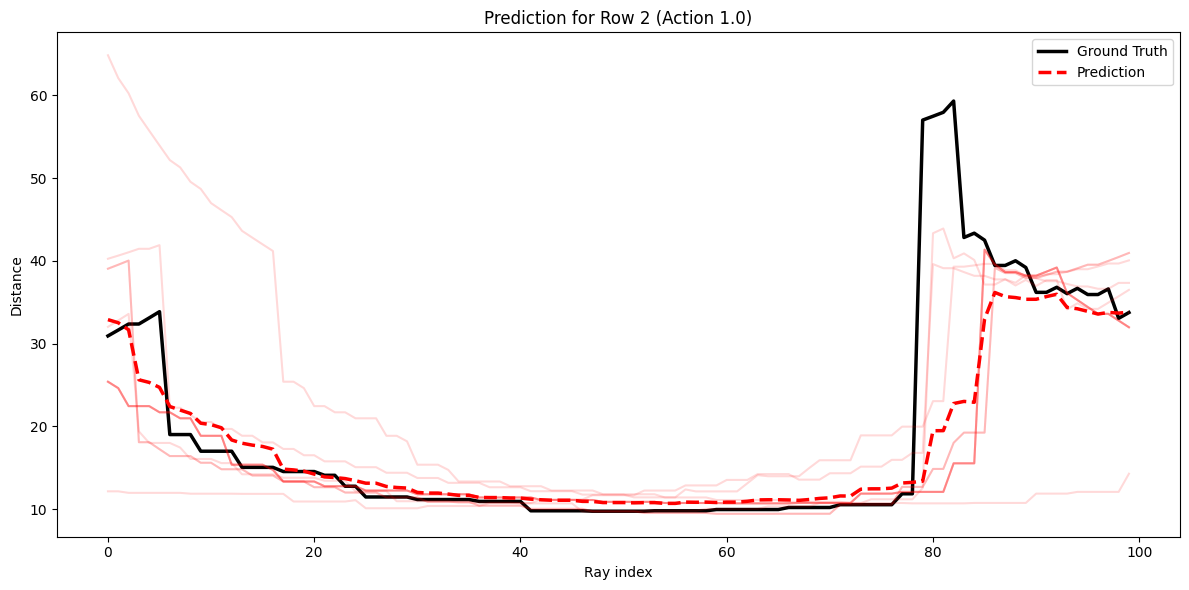

MSE: 75.0698, MAE: 3.5395


In [11]:
# %% [markdown]
# ### Predict Next Scan Using Neighbors (Same Action)

# %%
# Target index
target_idx = query_idx + 1

# Neighbor "next" scans (ensure we don't go out of bounds)
neighbor_next = [i + 1 for i in topn_idx if i + 1 < len(data)]
neighbor_futures = data.loc[neighbor_next, ray_cols].values

# Prediction & Ground Truth
predicted_scan = neighbor_futures.mean(axis=0)
ground_truth = data.loc[target_idx, ray_cols].values

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ground_truth, 'k', lw=2.5, label="Ground Truth")
plt.plot(predicted_scan, 'r--', lw=2.5, label="Prediction")
[plt.plot(fut, 'r', alpha=0.15) for fut in neighbor_futures]

plt.title(f"Prediction for Row {target_idx} (Action {query_action})")
plt.xlabel("Ray index"); plt.ylabel("Distance")
plt.legend(); plt.tight_layout(); plt.show()

# Quantify Error
mse = ((ground_truth - predicted_scan) ** 2).mean()
mae = np.abs(ground_truth - predicted_scan).mean()
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}")

### Multiple Queries 

Evaluating predictions: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


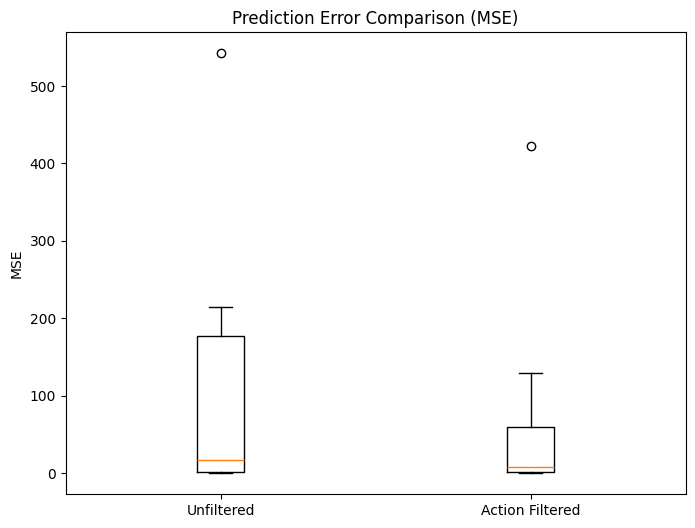

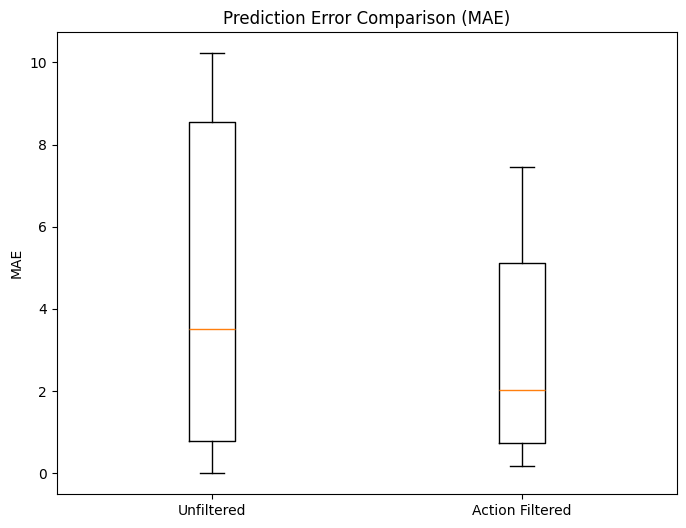

Unfiltered: MSE=110.3946, MAE=4.4860
Action filtered: MSE=68.8804, MAE=2.9092


In [14]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

num_queries = 1_0  # number of random query points to test
top_N = 10

mse_unfiltered = []
mae_unfiltered = []

mse_action = []
mae_action = []

ray_cols = [f"ray_{i}" for i in range(100)]
query_indices = np.random.choice(range(len(data)-1), num_queries, replace=False)

for query_idx in tqdm(query_indices, desc="Evaluating predictions"):
    # Query info
    query_row = data.loc[query_idx]
    query_ref = query_row[ray_cols].values
    query_action = query_row['action']

    # ---- Unfiltered neighbors ----
    dists = np.sum((data[ray_cols].values - query_ref) ** 2, axis=1)
    topn_idx = np.argsort(dists)[1:top_N+1]

    neighbor_next = [i+1 for i in topn_idx if i+1 < len(data)]
    neighbor_futures = data.loc[neighbor_next, ray_cols].values
    if len(neighbor_futures) > 0:
        pred = neighbor_futures.mean(axis=0)
        gt = data.loc[query_idx+1, ray_cols].values
        mse_unfiltered.append(((gt - pred)**2).mean())
        mae_unfiltered.append(np.abs(gt - pred).mean())

    # ---- Action-filtered neighbors ----
    mask = (data['action'] == query_action) & (data.index != query_idx)
    candidates = data.loc[mask, ray_cols].values
    if len(candidates) > 0:
        dists_action = np.sum((candidates - query_ref)**2, axis=1)
        candidate_indices = data.index[mask]
        topn_action_idx = candidate_indices[np.argsort(dists_action)[:top_N]]
        
        neighbor_next_action = [i+1 for i in topn_action_idx if i+1 < len(data)]
        neighbor_futures_action = data.loc[neighbor_next_action, ray_cols].values
        if len(neighbor_futures_action) > 0:
            pred_action = neighbor_futures_action.mean(axis=0)
            mse_action.append(((gt - pred_action)**2).mean())
            mae_action.append(np.abs(gt - pred_action).mean())

# ---- Plot results ----
plt.figure(figsize=(8,6))
plt.boxplot([mse_unfiltered, mse_action], tick_labels=["Unfiltered", "Action Filtered"])
plt.ylabel("MSE")
plt.title("Prediction Error Comparison (MSE)")
plt.show()

plt.figure(figsize=(8,6))
plt.boxplot([mae_unfiltered, mae_action], tick_labels=["Unfiltered", "Action Filtered"])
plt.ylabel("MAE")
plt.title("Prediction Error Comparison (MAE)")
plt.show()

# Summary stats
print(f"Unfiltered: MSE={np.mean(mse_unfiltered):.4f}, MAE={np.mean(mae_unfiltered):.4f}")
print(f"Action filtered: MSE={np.mean(mse_action):.4f}, MAE={np.mean(mae_action):.4f}")


Now let's do something else. 

We are going to consider nearby readings, recently experienced readings. 

We don't have a sense of direction (backward or sequential, just proximity). 

### Nearest Neighbors of Window of Lidar Readings 

Let's find, for a chosen window timesteps, the most similar lidar scans in the whole dataset and plots where those similar states occurred on the map, showing both positions and orientation arrows. Essentially: “Where else did the robot see something like this, and which way was it facing?”

Processing window: 100%|██████████| 20/20 [00:03<00:00,  6.07it/s]


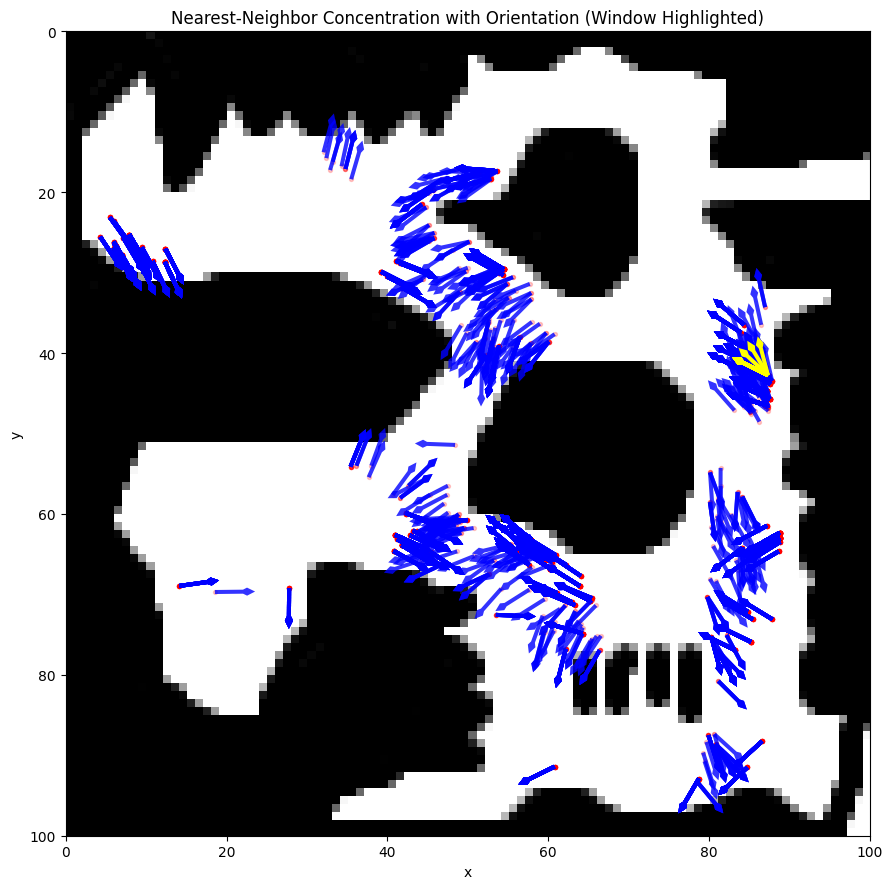

In [28]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

# -----------------------------
# Load metadata & map image
# -----------------------------
meta_path = f"{path}/metadata.json"
with open(meta_path, "r") as f:
    meta = json.load(f)

img_path = f"environments/images/{meta['environment_parameters']['map_image']}"
map_img = np.array(Image.open(img_path))

grid_w = meta['environment_parameters']['grid_width']
grid_h = meta['environment_parameters']['grid_height']

# -----------------------------
# Prepare data
# -----------------------------
ray_cols = [f"ray_{i}" for i in range(100)]

positions = data[['x', 'y']].values
lidars = data[ray_cols].values
orientations = np.deg2rad( data['orientation'].values )  # radians

# Window to analyze
window_start = 80_000 
window_size = 20 
window_indices = range(window_start, window_start + window_size)

top_N = 200  # nearest neighbors per query

all_neighbor_positions = []
all_neighbor_orient = []

window_positions = []
window_orientations = []

# -----------------------------
# Process each reading in window
# -----------------------------
for idx in tqdm(window_indices, desc="Processing window"):
    ref = lidars[idx]

    # Store query positions/orientations
    window_positions.append(positions[idx])
    window_orientations.append(orientations[idx])

    # Compute L2 distances
    dists = np.sum((lidars - ref)**2, axis=1)
    dists[idx] = np.inf

    nn_idx = np.argsort(dists)[:top_N]

    # Save neighbor positions + orientations
    all_neighbor_positions.extend(positions[nn_idx])
    all_neighbor_orient.extend(orientations[nn_idx])

# Convert to arrays
all_neighbor_positions = np.array(all_neighbor_positions)
all_neighbor_orient = np.array(all_neighbor_orient)

window_positions = np.array(window_positions)
window_orientations = np.array(window_orientations)

# Orientation → unit vectors
u_neighbors = np.cos(all_neighbor_orient)
v_neighbors = np.sin(all_neighbor_orient)

u_window = np.cos(window_orientations)
v_window = np.sin(window_orientations)

# -----------------------------
# Plot the concentration map
# -----------------------------
plt.figure(figsize=(9, 9))

# Background map
plt.imshow(map_img, cmap='gray', extent=[0, grid_w, grid_h, 0])

# Scatter for density
plt.scatter(
    all_neighbor_positions[:, 0],
    all_neighbor_positions[:, 1],
    s=8, c='red', alpha=0.20
)

# Neighbor arrows (blue)
plt.quiver(
    all_neighbor_positions[:, 0],
    all_neighbor_positions[:, 1],
    u_neighbors, v_neighbors,
    scale=20.0,
    color='blue',
    width=0.005,
    alpha=0.8,
    headwidth=2,
    headlength=2,
    headaxislength=3
)

# Query window arrows (yellow)
plt.quiver(
    window_positions[:, 0],
    window_positions[:, 1],
    u_window, v_window,
    scale=20.0,
    color='yellow',
    width=0.005,
    alpha=1.0,
    headwidth=2,
    headlength=2,
    headaxislength=3
)

plt.title("Nearest-Neighbor Concentration with Orientation (Window Highlighted)")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()


### Show the Active Indices on the Timeline

#### Visualize the Top Nearest Neighbors on a Timeline 

We represent the timeline as a 2d image, since a 1d would be too long for display. We use it to visualize where in the timeline nearest neighbors are

In [33]:
# --- Get Window --- 
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Parameters
# -----------------------------
n_readings = len(lidars)  # total lidar readings

# Convert window_indices to numpy
window_indices = np.array(window_indices)
window_indices

array([80000, 80001, 80002, 80003, 80004, 80005, 80006, 80007, 80008,
       80009, 80010, 80011, 80012, 80013, 80014, 80015, 80016, 80017,
       80018, 80019])

In [38]:
from tqdm import tqdm

# --- Get nearest neighbors --- 
# -----------------------------
# Compute neighbor counts per index
# -----------------------------
nn_counts = np.zeros(n_readings, dtype=int)

for idx in tqdm(window_indices, desc="Computing nearest neighbors"):
    ref = lidars[idx]                           # get ridar reading for step in window 
    dists = np.sum((lidars - ref) ** 2, axis=1) # compute distances between step lidar and the rest of lidar (these are distances squared, but no 
                                                # need to squareroot since ordering doesn't matter)
    dists[idx] = np.inf                         # set distance to self as infinity                       
    nn_idx = np.argsort(dists)[:top_N]          # get indices of nearest neighbors (these are top_N indices, not one index)
    nn_counts[nn_idx] += 1                      # add +1 to the count for each nearest neighbor 


Computing nearest neighbors: 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]


In [43]:
indices_multiple_neighbors = np.where(nn_counts > 1)[0]
indices_multiple_neighbors

array([ 3282,  4224,  4226,  4254,  4255,  5641,  6804,  6835,  6837,
        7785, 13664, 13733, 17416, 17743, 19718, 20306, 20307, 22725,
       22796, 23510, 25053, 25054, 25055, 25103, 25120, 25828, 27121,
       27122, 27123, 27124, 27125, 27126, 27127, 27128, 27129, 29300,
       29308, 29318, 29320, 30543, 31131, 33180, 34119, 34157, 34200,
       34202, 38546, 38658, 38739, 38747, 38748, 38749, 39313, 39645,
       42578, 42631, 42735, 42784, 44967, 45738, 45938, 46612, 46613,
       46614, 46615, 46616, 46617, 46618, 46619, 46620, 46621, 46622,
       46902, 47123, 47524, 47556, 50346, 50853, 53050, 53051, 53052,
       54162, 61010, 61026, 61036, 63818, 63934, 63935, 63936, 63937,
       63958, 66581, 67097, 67579, 67595, 67627, 69460, 71676, 71680,
       79357, 79612, 79630, 79997, 79998, 79999, 80000, 80001, 80002,
       80003, 80004, 80005, 80006, 80007, 80008, 80009, 80010, 80011,
       80012, 80013, 80014, 80015, 80016, 80026, 80060, 80935, 80939,
       80967, 81052,

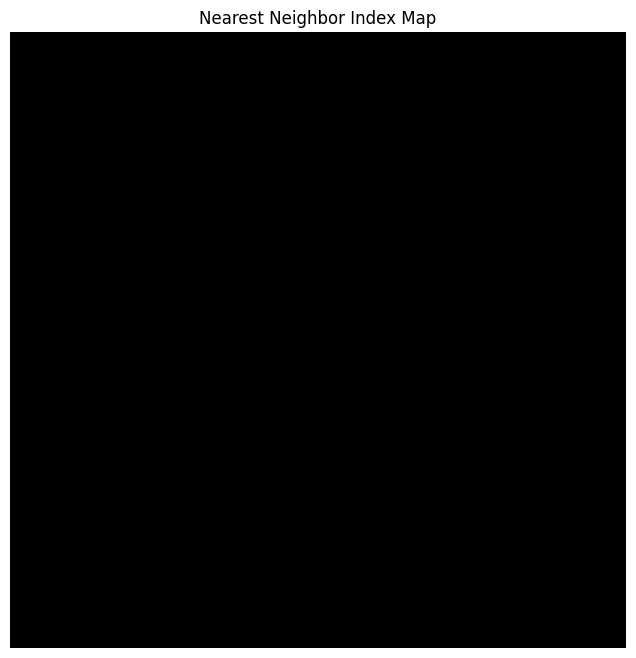

In [96]:
# --- View Image Without Any Nearest Neighbor Counts 
# -----------------------------
# Build 2D image
# -----------------------------
img_size = int(np.ceil(np.sqrt(n_readings))) # determine image width and height 

img = np.zeros((img_size, img_size, 3), dtype=np.float32)

# -----------------------------
# Show image
# -----------------------------
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Nearest Neighbor Index Map")
plt.show()


In [97]:
# for each index, we want to get the row and column in the image
rows = np.arange(n_readings) // img_size
cols = np.arange(n_readings) % img_size
rows[:img_size+1] # the first img_size values are in row 0, the next img_size values are in the next row (row 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [98]:
cols[:img_size+1] # the first img_size values are in subsequent columns, the next img_size values follow the same pattern 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [99]:
# --- Image Shape --- 
img.shape

(317, 317, 3)

In [100]:
nn_counts / nn_counts.max()  # normalize 0-1

array([0., 0., 0., ..., 0., 0., 0.])

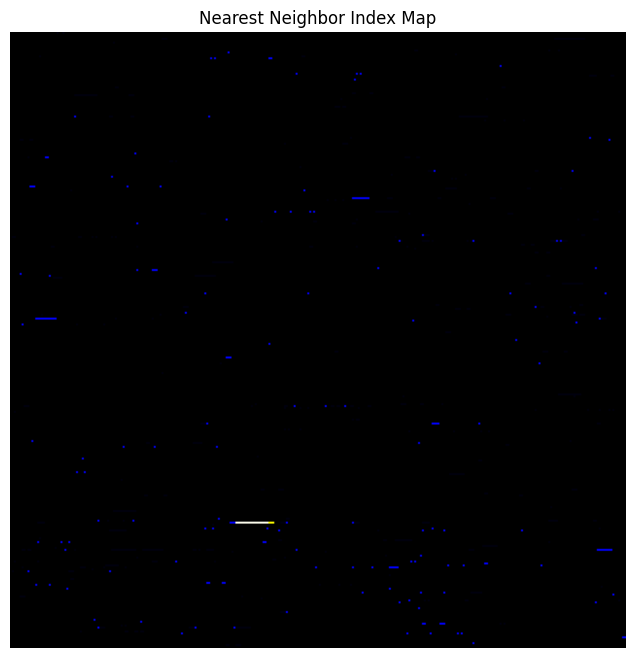

In [101]:


# Blue channel for neighbor counts
img[rows, cols, 2] = nn_counts / nn_counts.max()  # normalize 0-1

# Yellow for window indices
img[window_indices // img_size, window_indices % img_size, 0] = 1.0  # red - index image by row (//), then col (%), then red channel (0)
img[window_indices // img_size, window_indices % img_size, 1] = 1.0  # green


# -----------------------------
# Show image
# -----------------------------
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Nearest Neighbor Index Map")
plt.show()

#### Histogram of counts 

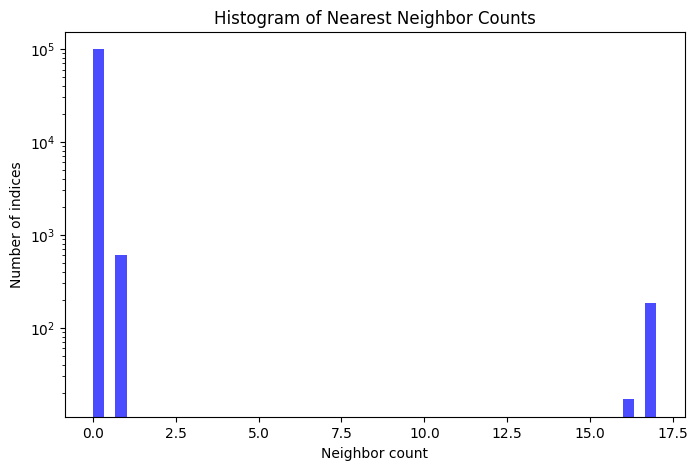

In [102]:
# --- Histogram of counts --- 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(nn_counts, bins=50, color='blue', alpha=0.7)
plt.xlabel("Neighbor count")
plt.ylabel("Number of indices")
plt.title("Histogram of Nearest Neighbor Counts")
plt.yscale('log')  # optional: log scale if very skewed
plt.show()


It's interesting that our readings take only extreme counts. 

Maybe we should try with other datasets. 

#### Show Top Clusters in Temporal Sliding Window
- We use a handcrafted value here (the sliding window length)
- We don't use a handcrafted threshold though, we just use **ranking** 

In [106]:
import numpy as np

# Parameters
window_size = 20  # number of indices per window
n_windows = len(nn_counts) // window_size

# Compute sum of counts in each window
window_sums = np.array([nn_counts[i*window_size:(i+1)*window_size].sum()
                        for i in range(n_windows)])

# Pick top windows
top_k = 10
top_windows_idx = np.argsort(window_sums)[-top_k:]  # indices of top windows

# Convert window indices to actual data indices
top_windows_ranges = [(i*window_size, (i+1)*window_size) for i in top_windows_idx]

print("Top windows (start_idx, end_idx):")
for start, end in top_windows_ranges:
    print(start, end)


Top windows (start_idx, end_idx):
29300 29320
53040 53060
38740 38760
63920 63940
96580 96600
87360 87380
46600 46620
84620 84640
27120 27140
80000 80020


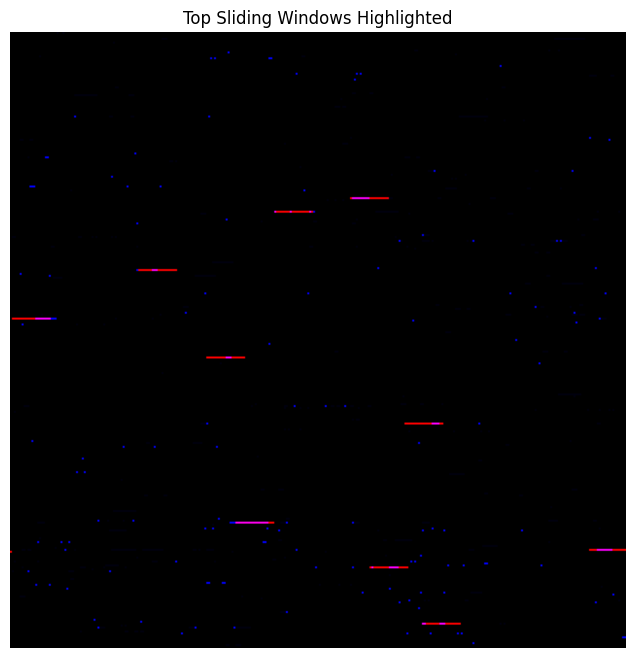

In [107]:
for start, end in top_windows_ranges:
    img_rows = np.arange(start, end) // img_size
    img_cols = np.arange(start, end) % img_size
    img[img_rows, img_cols, 0] = 1.0  # red
    img[img_rows, img_cols, 1] = 0.0  # remove green if needed

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off')
plt.title("Top Sliding Windows Highlighted")
plt.show()


#### Plot the Windows Containing Top Dense Matches in Map 

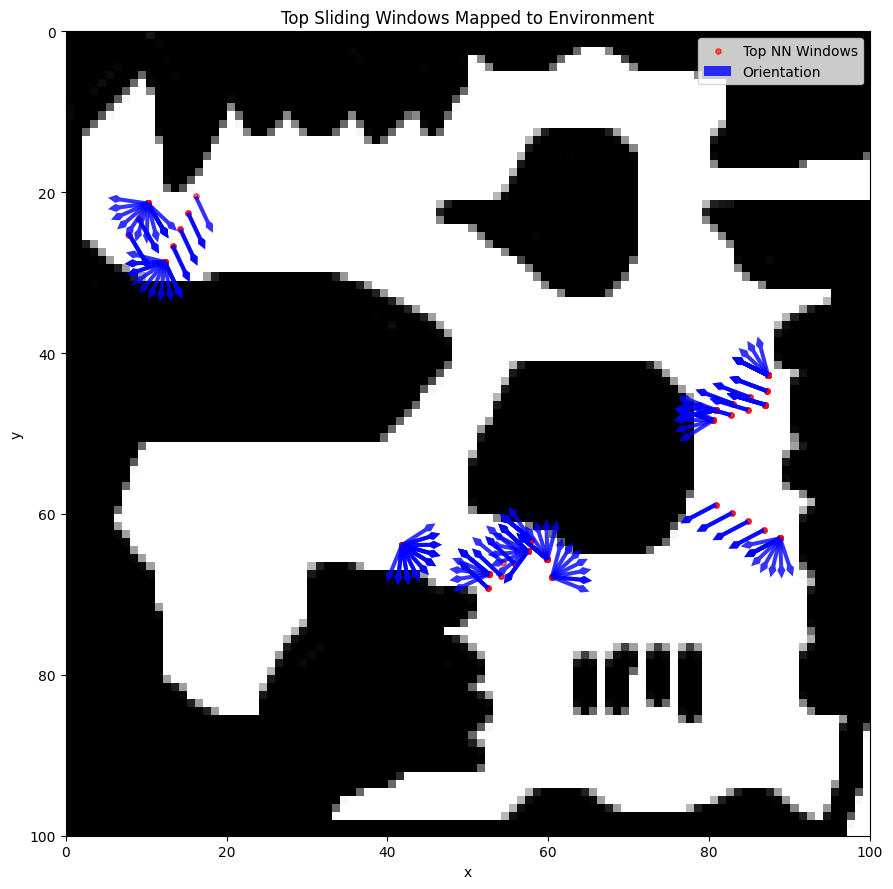

In [108]:
# -----------------------------
# Gather positions & orientations for top windows
# -----------------------------
top_indices = []
for start, end in top_windows_ranges:
    top_indices.extend(range(start, end))
top_indices = np.array(top_indices)

top_positions = positions[top_indices]
top_orientations = orientations[top_indices]

# Unit vectors for arrows
u_top = np.cos(top_orientations)
v_top = np.sin(top_orientations)

# -----------------------------
# Plot on environment map
# -----------------------------
plt.figure(figsize=(9, 9))
plt.imshow(map_img, cmap='gray', extent=[0, grid_w, grid_h, 0])

# Scatter top window positions
plt.scatter(top_positions[:,0], top_positions[:,1],
            s=15, c='red', alpha=0.6, label='Top NN Windows')

# Orientation arrows
plt.quiver(top_positions[:,0], top_positions[:,1],
           u_top, v_top,
           scale=20.0,
           color='blue',
           width=0.005,
           alpha=0.8,
           headwidth=2,
           headlength=2,
           headaxislength=3,
           label='Orientation')

plt.title("Top Sliding Windows Mapped to Environment")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()


#### Different Color on Map for Each Cluster

C:\Users\HP\AppData\Local\Temp\ipykernel_6684\893353012.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', num_groups)  # or 'tab20' if more than 10 groups


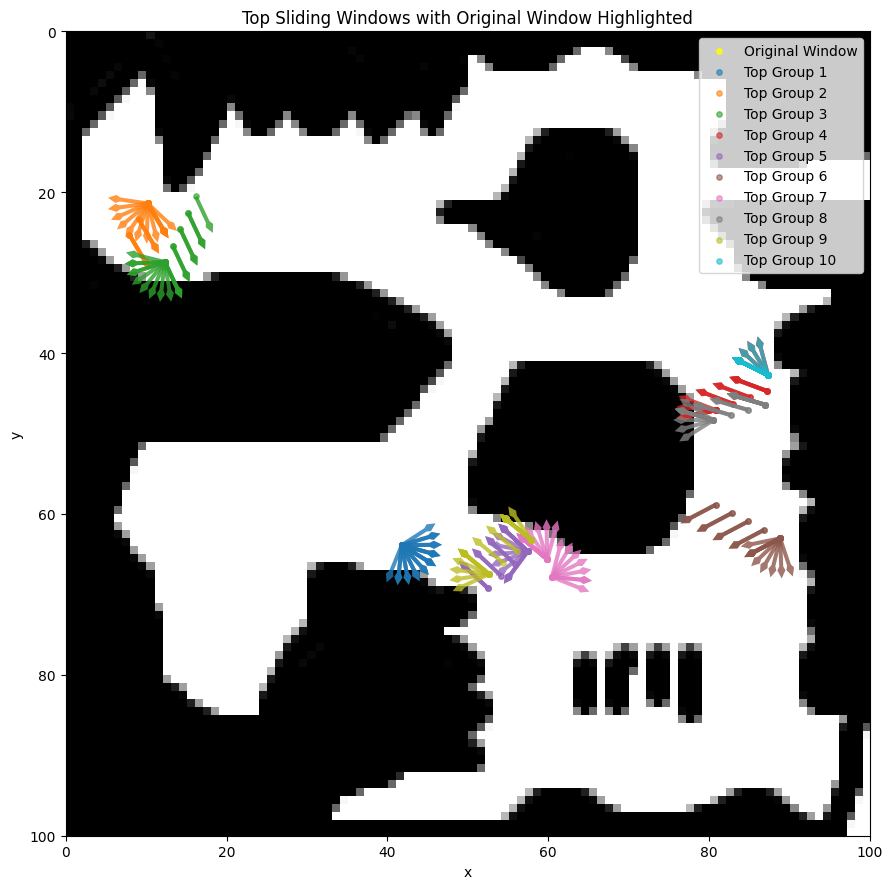

In [111]:
import matplotlib.cm as cm

# -----------------------------
# Assign colors to top groups
# -----------------------------
num_groups = len(top_windows_ranges)
cmap = cm.get_cmap('tab10', num_groups)  # or 'tab20' if more than 10 groups

plt.figure(figsize=(9, 9))
plt.imshow(map_img, cmap='gray', extent=[0, grid_w, grid_h, 0])

# --- Original window (yellow) ---
plt.scatter(window_positions[:,0], window_positions[:,1],
            s=15, color='yellow', alpha=0.8, label='Original Window')

u_window = np.cos(window_orientations)
v_window = np.sin(window_orientations)
plt.quiver(window_positions[:,0], window_positions[:,1],
           u_window, v_window,
           scale=20.0,
           color='red',
           width=0.005,
           alpha=0.9,
           headwidth=2,
           headlength=2,
           headaxislength=3)

# --- Top sliding windows (colored groups) ---
for i, (start, end) in enumerate(top_windows_ranges):
    group_indices = np.arange(start, end)
    group_positions = positions[group_indices]
    group_orientations = orientations[group_indices]
    
    u = np.cos(group_orientations)
    v = np.sin(group_orientations)
    
    plt.scatter(group_positions[:,0], group_positions[:,1],
                s=15, alpha=0.6, color=cmap(i),
                label=f'Top Group {i+1}')
    
    plt.quiver(group_positions[:,0], group_positions[:,1],
               u, v,
               scale=20.0,
               color=cmap(i),
               width=0.005,
               alpha=0.8,
               headwidth=2,
               headlength=2,
               headaxislength=3)

plt.title("Top Sliding Windows with Original Window Highlighted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()


#### Try Predict Reading

0 Window NN Prediction: MSE=60.2890, MAE=6.1710


1 Window NN Prediction: MSE=59.1354, MAE=6.4891


2 Window NN Prediction: MSE=50.1392, MAE=5.3289


3 Window NN Prediction: MSE=54.9830, MAE=5.7732


4 Window NN Prediction: MSE=45.5800, MAE=5.0973


5 Window NN Prediction: MSE=50.2467, MAE=5.3937


6 Window NN Prediction: MSE=53.2131, MAE=5.4872


7 Window NN Prediction: MSE=56.7557, MAE=5.7228


8 Window NN Prediction: MSE=50.4627, MAE=5.1200


9 Window NN Prediction: MSE=45.9069, MAE=4.7636


10 Window NN Prediction: MSE=43.6324, MAE=4.6004


11 Window NN Prediction: MSE=48.1817, MAE=4.9497


12 Window NN Prediction: MSE=50.7950, MAE=5.1446


13 Window NN Prediction: MSE=48.0956, MAE=4.9889


14 Window NN Prediction: MSE=49.8134, MAE=5.1165


15 Window NN Prediction: MSE=50.9251, MAE=5.2411


16 Window NN Prediction: MSE=48.5714, MAE=5.0484


17 Window NN Prediction: MSE=48.5110, MAE=5.1228


18 Window NN Prediction: MSE=49.2681, MAE=5.1817


19 Window NN Prediction: MSE=47.0003, MAE=5.0018


20 Window NN Prediction: MSE=47.9630, MAE=5.0895


21 Window NN Prediction: MSE=46.0533, MAE=4.9350


22 Window NN Prediction: MSE=44.3757, MAE=4.8125


23 Window NN Prediction: MSE=42.5449, MAE=4.6298


24 Window NN Prediction: MSE=41.5830, MAE=4.5104


25 Window NN Prediction: MSE=40.8600, MAE=4.4623


26 Window NN Prediction: MSE=39.3467, MAE=4.2970


27 Window NN Prediction: MSE=39.3679, MAE=4.3181


28 Window NN Prediction: MSE=38.2289, MAE=4.2333


29 Window NN Prediction: MSE=39.7892, MAE=4.2799


30 Window NN Prediction: MSE=42.5561, MAE=4.3718


31 Window NN Prediction: MSE=41.7995, MAE=4.3153


32 Window NN Prediction: MSE=40.5426, MAE=4.1987


33 Window NN Prediction: MSE=40.8383, MAE=4.2460


34 Window NN Prediction: MSE=40.5127, MAE=4.2551


35 Window NN Prediction: MSE=41.0058, MAE=4.2849


36 Window NN Prediction: MSE=40.2001, MAE=4.2357


37 Window NN Prediction: MSE=39.1422, MAE=4.1243


38 Window NN Prediction: MSE=39.0619, MAE=4.1389


39 Window NN Prediction: MSE=38.1914, MAE=4.0649


40 Window NN Prediction: MSE=37.3061, MAE=3.9951


41 Window NN Prediction: MSE=36.4291, MAE=3.9121


42 Window NN Prediction: MSE=37.3216, MAE=3.9687


43 Window NN Prediction: MSE=39.4865, MAE=4.0555


44 Window NN Prediction: MSE=38.6090, MAE=3.9654


45 Window NN Prediction: MSE=37.9877, MAE=3.9251


46 Window NN Prediction: MSE=98.8089, MAE=4.4049


47 Window NN Prediction: MSE=98.9466, MAE=4.4600


48 Window NN Prediction: MSE=98.5212, MAE=4.4872


49 Window NN Prediction: MSE=96.9241, MAE=4.4669


50 Window NN Prediction: MSE=98.0625, MAE=4.5059


51 Window NN Prediction: MSE=98.2078, MAE=4.5866


52 Window NN Prediction: MSE=97.0771, MAE=4.5709


53 Window NN Prediction: MSE=95.9286, MAE=4.5886


54 Window NN Prediction: MSE=94.6092, MAE=4.5798


55 Window NN Prediction: MSE=92.9667, MAE=4.5185


56 Window NN Prediction: MSE=91.5955, MAE=4.4853


57 Window NN Prediction: MSE=91.4717, MAE=4.5258


58 Window NN Prediction: MSE=91.2725, MAE=4.5656


59 Window NN Prediction: MSE=90.8059, MAE=4.5770


60 Window NN Prediction: MSE=89.3929, MAE=4.5306


61 Window NN Prediction: MSE=88.2735, MAE=4.5214


62 Window NN Prediction: MSE=87.4727, MAE=4.5099


63 Window NN Prediction: MSE=86.2476, MAE=4.4727


64 Window NN Prediction: MSE=85.8404, MAE=4.5126


65 Window NN Prediction: MSE=84.7695, MAE=4.4808


66 Window NN Prediction: MSE=83.5376, MAE=4.4271


67 Window NN Prediction: MSE=85.5980, MAE=4.5189


68 Window NN Prediction: MSE=84.5009, MAE=4.4889


69 Window NN Prediction: MSE=83.3679, MAE=4.4562


70 Window NN Prediction: MSE=85.6282, MAE=4.5281


71 Window NN Prediction: MSE=84.8536, MAE=4.5138


72 Window NN Prediction: MSE=83.9695, MAE=4.5058


73 Window NN Prediction: MSE=82.8386, MAE=4.4517


74 Window NN Prediction: MSE=81.8749, MAE=4.4294


75 Window NN Prediction: MSE=81.0337, MAE=4.4122


76 Window NN Prediction: MSE=80.1410, MAE=4.3824


77 Window NN Prediction: MSE=79.2133, MAE=4.3494


78 Window NN Prediction: MSE=79.4496, MAE=4.3855


79 Window NN Prediction: MSE=78.5074, MAE=4.3543


80 Window NN Prediction: MSE=79.7320, MAE=4.4120


81 Window NN Prediction: MSE=78.8990, MAE=4.3852


82 Window NN Prediction: MSE=78.2184, MAE=4.3852


83 Window NN Prediction: MSE=79.1237, MAE=4.4191


84 Window NN Prediction: MSE=81.1725, MAE=4.5056


85 Window NN Prediction: MSE=80.6000, MAE=4.5156


86 Window NN Prediction: MSE=79.6759, MAE=4.4677


87 Window NN Prediction: MSE=79.3224, MAE=4.4743


88 Window NN Prediction: MSE=78.8379, MAE=4.4686


89 Window NN Prediction: MSE=77.9858, MAE=4.4289


90 Window NN Prediction: MSE=77.4860, MAE=4.4346


91 Window NN Prediction: MSE=80.9550, MAE=4.5326


92 Window NN Prediction: MSE=80.0845, MAE=4.4838


93 Window NN Prediction: MSE=79.7014, MAE=4.4902


94 Window NN Prediction: MSE=78.8770, MAE=4.4536


95 Window NN Prediction: MSE=78.2204, MAE=4.4341


96 Window NN Prediction: MSE=77.7254, MAE=4.4268


97 Window NN Prediction: MSE=78.1107, MAE=4.4721


98 Window NN Prediction: MSE=77.7423, MAE=4.4844


99 Window NN Prediction: MSE=77.0457, MAE=4.4601


100 Window NN Prediction: MSE=76.5903, MAE=4.4460


101 Window NN Prediction: MSE=75.8432, MAE=4.4073


102 Window NN Prediction: MSE=75.6314, MAE=4.4210


103 Window NN Prediction: MSE=75.0899, MAE=4.4128


104 Window NN Prediction: MSE=74.4762, MAE=4.4004


105 Window NN Prediction: MSE=73.8016, MAE=4.3722


106 Window NN Prediction: MSE=74.7836, MAE=4.4193


107 Window NN Prediction: MSE=74.9172, MAE=4.4291


108 Window NN Prediction: MSE=75.1553, MAE=4.4473


109 Window NN Prediction: MSE=74.6033, MAE=4.4357


110 Window NN Prediction: MSE=74.4075, MAE=4.4302


111 Window NN Prediction: MSE=74.1958, MAE=4.4498


112 Window NN Prediction: MSE=73.6180, MAE=4.4266


113 Window NN Prediction: MSE=73.1184, MAE=4.4119


114 Window NN Prediction: MSE=72.6804, MAE=4.4048


115 Window NN Prediction: MSE=72.3186, MAE=4.3967


116 Window NN Prediction: MSE=72.5667, MAE=4.4089


117 Window NN Prediction: MSE=72.3215, MAE=4.4066


118 Window NN Prediction: MSE=71.8229, MAE=4.3864


119 Window NN Prediction: MSE=71.6541, MAE=4.3780


120 Window NN Prediction: MSE=71.0627, MAE=4.3439


121 Window NN Prediction: MSE=70.8627, MAE=4.3585


122 Window NN Prediction: MSE=70.5229, MAE=4.3516


123 Window NN Prediction: MSE=69.9863, MAE=4.3295


124 Window NN Prediction: MSE=71.1163, MAE=4.3742


125 Window NN Prediction: MSE=70.9520, MAE=4.3795


126 Window NN Prediction: MSE=70.4334, MAE=4.3562


127 Window NN Prediction: MSE=69.9455, MAE=4.3388


128 Window NN Prediction: MSE=69.4896, MAE=4.3263


129 Window NN Prediction: MSE=69.0051, MAE=4.3060


130 Window NN Prediction: MSE=69.8376, MAE=4.3435


131 Window NN Prediction: MSE=70.2934, MAE=4.3700


132 Window NN Prediction: MSE=71.0107, MAE=4.4050


133 Window NN Prediction: MSE=72.7544, MAE=4.4681


134 Window NN Prediction: MSE=74.0258, MAE=4.5274


135 Window NN Prediction: MSE=73.5069, MAE=4.5041


136 Window NN Prediction: MSE=73.0163, MAE=4.4835


137 Window NN Prediction: MSE=72.5386, MAE=4.4608


138 Window NN Prediction: MSE=72.0771, MAE=4.4417


139 Window NN Prediction: MSE=72.7662, MAE=4.4844


140 Window NN Prediction: MSE=72.4158, MAE=4.4818


141 Window NN Prediction: MSE=71.9215, MAE=4.4592


142 Window NN Prediction: MSE=72.0372, MAE=4.4878


143 Window NN Prediction: MSE=72.5363, MAE=4.5011


144 Window NN Prediction: MSE=72.3790, MAE=4.5041


145 Window NN Prediction: MSE=71.9112, MAE=4.4849


146 Window NN Prediction: MSE=71.5485, MAE=4.4803


147 Window NN Prediction: MSE=71.1905, MAE=4.4682


148 Window NN Prediction: MSE=70.7987, MAE=4.4594


149 Window NN Prediction: MSE=70.7311, MAE=4.4774


150 Window NN Prediction: MSE=70.4106, MAE=4.4767


151 Window NN Prediction: MSE=70.2239, MAE=4.4766


152 Window NN Prediction: MSE=69.9639, MAE=4.4804


153 Window NN Prediction: MSE=70.3747, MAE=4.5138


154 Window NN Prediction: MSE=71.1574, MAE=4.5527


155 Window NN Prediction: MSE=70.8695, MAE=4.5529


156 Window NN Prediction: MSE=71.1648, MAE=4.5789


157 Window NN Prediction: MSE=70.8132, MAE=4.5717


158 Window NN Prediction: MSE=71.5356, MAE=4.6109


159 Window NN Prediction: MSE=71.0970, MAE=4.5884


160 Window NN Prediction: MSE=70.6790, MAE=4.5691


161 Window NN Prediction: MSE=71.3302, MAE=4.5941


162 Window NN Prediction: MSE=70.9110, MAE=4.5760


163 Window NN Prediction: MSE=70.4944, MAE=4.5557


164 Window NN Prediction: MSE=70.0789, MAE=4.5320


165 Window NN Prediction: MSE=70.1691, MAE=4.5499


166 Window NN Prediction: MSE=69.8309, MAE=4.5379


167 Window NN Prediction: MSE=69.6548, MAE=4.5305


168 Window NN Prediction: MSE=69.5205, MAE=4.5431


169 Window NN Prediction: MSE=69.2794, MAE=4.5345


170 Window NN Prediction: MSE=69.4616, MAE=4.5400


171 Window NN Prediction: MSE=69.3926, MAE=4.5550


172 Window NN Prediction: MSE=69.1363, MAE=4.5499


173 Window NN Prediction: MSE=69.0336, MAE=4.5581


174 Window NN Prediction: MSE=69.3370, MAE=4.5707


175 Window NN Prediction: MSE=69.1026, MAE=4.5718


176 Window NN Prediction: MSE=68.7124, MAE=4.5468


177 Window NN Prediction: MSE=68.3693, MAE=4.5311


178 Window NN Prediction: MSE=68.0991, MAE=4.5231


179 Window NN Prediction: MSE=67.7234, MAE=4.5006


180 Window NN Prediction: MSE=67.5662, MAE=4.5037


181 Window NN Prediction: MSE=69.1309, MAE=4.5532


182 Window NN Prediction: MSE=69.5491, MAE=4.5804


183 Window NN Prediction: MSE=69.3057, MAE=4.5815


184 Window NN Prediction: MSE=69.0083, MAE=4.5709


185 Window NN Prediction: MSE=68.9607, MAE=4.5680


186 Window NN Prediction: MSE=68.5919, MAE=4.5436


187 Window NN Prediction: MSE=68.4360, MAE=4.5499


188 Window NN Prediction: MSE=68.2743, MAE=4.5511


189 Window NN Prediction: MSE=69.1158, MAE=4.5873


190 Window NN Prediction: MSE=68.8656, MAE=4.5732


191 Window NN Prediction: MSE=68.8603, MAE=4.5745


192 Window NN Prediction: MSE=68.5127, MAE=4.5556


193 Window NN Prediction: MSE=68.1732, MAE=4.5403


194 Window NN Prediction: MSE=67.8911, MAE=4.5321


195 Window NN Prediction: MSE=68.3075, MAE=4.5489


196 Window NN Prediction: MSE=68.0193, MAE=4.5355


197 Window NN Prediction: MSE=67.8272, MAE=4.5322


198 Window NN Prediction: MSE=67.8472, MAE=4.5471


199 Window NN Prediction: MSE=67.6395, MAE=4.5463


200 Window NN Prediction: MSE=67.3211, MAE=4.5313


201 Window NN Prediction: MSE=67.0923, MAE=4.5270


202 Window NN Prediction: MSE=66.8366, MAE=4.5185


203 Window NN Prediction: MSE=66.6163, MAE=4.5163


204 Window NN Prediction: MSE=66.5594, MAE=4.5136


205 Window NN Prediction: MSE=66.9223, MAE=4.5262


206 Window NN Prediction: MSE=66.6386, MAE=4.5160


207 Window NN Prediction: MSE=66.5858, MAE=4.5199


208 Window NN Prediction: MSE=66.6079, MAE=4.5328


209 Window NN Prediction: MSE=66.4264, MAE=4.5362


210 Window NN Prediction: MSE=66.4175, MAE=4.5421


211 Window NN Prediction: MSE=66.1721, MAE=4.5377


212 Window NN Prediction: MSE=66.0049, MAE=4.5324


213 Window NN Prediction: MSE=65.7718, MAE=4.5283


214 Window NN Prediction: MSE=65.4821, MAE=4.5156


215 Window NN Prediction: MSE=65.1962, MAE=4.5018


216 Window NN Prediction: MSE=65.0246, MAE=4.4961


217 Window NN Prediction: MSE=64.8544, MAE=4.4939


218 Window NN Prediction: MSE=64.9759, MAE=4.5113


219 Window NN Prediction: MSE=64.7530, MAE=4.5067


220 Window NN Prediction: MSE=64.6014, MAE=4.5057


221 Window NN Prediction: MSE=64.3429, MAE=4.4929


222 Window NN Prediction: MSE=64.3613, MAE=4.5025


223 Window NN Prediction: MSE=64.0919, MAE=4.4899


224 Window NN Prediction: MSE=63.8930, MAE=4.4842


225 Window NN Prediction: MSE=63.8117, MAE=4.4900


226 Window NN Prediction: MSE=63.9454, MAE=4.5014


227 Window NN Prediction: MSE=63.8174, MAE=4.5026


228 Window NN Prediction: MSE=63.7527, MAE=4.5117


229 Window NN Prediction: MSE=64.0587, MAE=4.5310


230 Window NN Prediction: MSE=63.7814, MAE=4.5114


231 Window NN Prediction: MSE=63.5136, MAE=4.4973


232 Window NN Prediction: MSE=63.2678, MAE=4.4877


233 Window NN Prediction: MSE=63.0539, MAE=4.4821


234 Window NN Prediction: MSE=62.8766, MAE=4.4754


235 Window NN Prediction: MSE=62.6102, MAE=4.4565


236 Window NN Prediction: MSE=62.3468, MAE=4.4394


237 Window NN Prediction: MSE=62.2588, MAE=4.4408


238 Window NN Prediction: MSE=62.1620, MAE=4.4434


239 Window NN Prediction: MSE=62.1027, MAE=4.4495


240 Window NN Prediction: MSE=63.0176, MAE=4.4806


241 Window NN Prediction: MSE=62.7591, MAE=4.4646


242 Window NN Prediction: MSE=63.1755, MAE=4.4846


243 Window NN Prediction: MSE=62.9450, MAE=4.4733


244 Window NN Prediction: MSE=62.7849, MAE=4.4708


245 Window NN Prediction: MSE=62.6676, MAE=4.4664


246 Window NN Prediction: MSE=62.9543, MAE=4.4843


247 Window NN Prediction: MSE=62.7165, MAE=4.4736


248 Window NN Prediction: MSE=63.5680, MAE=4.5130


249 Window NN Prediction: MSE=63.5582, MAE=4.5241


250 Window NN Prediction: MSE=63.6342, MAE=4.5334


251 Window NN Prediction: MSE=63.4007, MAE=4.5229


252 Window NN Prediction: MSE=63.1696, MAE=4.5106


253 Window NN Prediction: MSE=63.3794, MAE=4.5167


254 Window NN Prediction: MSE=63.4598, MAE=4.5247


255 Window NN Prediction: MSE=63.3939, MAE=4.5257


256 Window NN Prediction: MSE=64.1282, MAE=4.5552


257 Window NN Prediction: MSE=64.0497, MAE=4.5524


258 Window NN Prediction: MSE=64.1144, MAE=4.5661


259 Window NN Prediction: MSE=64.5771, MAE=4.5852


260 Window NN Prediction: MSE=64.3602, MAE=4.5742


261 Window NN Prediction: MSE=64.3697, MAE=4.5814


262 Window NN Prediction: MSE=64.3039, MAE=4.5865


263 Window NN Prediction: MSE=64.2306, MAE=4.5890


264 Window NN Prediction: MSE=64.0375, MAE=4.5824


265 Window NN Prediction: MSE=64.8388, MAE=4.6033


266 Window NN Prediction: MSE=64.8924, MAE=4.6061


267 Window NN Prediction: MSE=65.0535, MAE=4.6234


268 Window NN Prediction: MSE=64.8306, MAE=4.6136


269 Window NN Prediction: MSE=64.6499, MAE=4.6086


270 Window NN Prediction: MSE=64.6931, MAE=4.6206


271 Window NN Prediction: MSE=64.4655, MAE=4.6088


272 Window NN Prediction: MSE=64.2319, MAE=4.5943


273 Window NN Prediction: MSE=64.0957, MAE=4.5886


274 Window NN Prediction: MSE=63.8683, MAE=4.5760


275 Window NN Prediction: MSE=64.3774, MAE=4.5991


276 Window NN Prediction: MSE=65.2288, MAE=4.6306


277 Window NN Prediction: MSE=64.9971, MAE=4.6159


278 Window NN Prediction: MSE=64.9600, MAE=4.6190


279 Window NN Prediction: MSE=64.7280, MAE=4.6025


280 Window NN Prediction: MSE=64.6384, MAE=4.6031


281 Window NN Prediction: MSE=64.4156, MAE=4.5903


282 Window NN Prediction: MSE=64.4836, MAE=4.5956


283 Window NN Prediction: MSE=64.2946, MAE=4.5907


284 Window NN Prediction: MSE=64.0690, MAE=4.5746


285 Window NN Prediction: MSE=63.8450, MAE=4.5586


286 Window NN Prediction: MSE=63.6876, MAE=4.5570


287 Window NN Prediction: MSE=63.5066, MAE=4.5476


288 Window NN Prediction: MSE=63.4032, MAE=4.5474


289 Window NN Prediction: MSE=63.3017, MAE=4.5495


290 Window NN Prediction: MSE=63.1299, MAE=4.5442


291 Window NN Prediction: MSE=62.9239, MAE=4.5337


292 Window NN Prediction: MSE=62.7138, MAE=4.5213


293 Window NN Prediction: MSE=62.8384, MAE=4.5334


294 Window NN Prediction: MSE=62.6254, MAE=4.5181


295 Window NN Prediction: MSE=63.0029, MAE=4.5282


296 Window NN Prediction: MSE=62.8597, MAE=4.5279


297 Window NN Prediction: MSE=62.6487, MAE=4.5127


298 Window NN Prediction: MSE=62.6779, MAE=4.5253


299 Window NN Prediction: MSE=62.5157, MAE=4.5205


300 Window NN Prediction: MSE=62.4226, MAE=4.5169


301 Window NN Prediction: MSE=62.2883, MAE=4.5142


302 Window NN Prediction: MSE=62.2393, MAE=4.5174


303 Window NN Prediction: MSE=62.0517, MAE=4.5082


304 Window NN Prediction: MSE=62.1337, MAE=4.5105


305 Window NN Prediction: MSE=62.0114, MAE=4.5092


306 Window NN Prediction: MSE=62.0356, MAE=4.5136


307 Window NN Prediction: MSE=61.8965, MAE=4.5116


308 Window NN Prediction: MSE=61.7364, MAE=4.5072


309 Window NN Prediction: MSE=61.7472, MAE=4.5137


310 Window NN Prediction: MSE=61.5779, MAE=4.5058


311 Window NN Prediction: MSE=61.6307, MAE=4.5068


312 Window NN Prediction: MSE=61.4387, MAE=4.4955


313 Window NN Prediction: MSE=61.6753, MAE=4.5116


314 Window NN Prediction: MSE=61.5673, MAE=4.5060


315 Window NN Prediction: MSE=61.4039, MAE=4.4978


316 Window NN Prediction: MSE=61.3274, MAE=4.4955


317 Window NN Prediction: MSE=61.2104, MAE=4.4964


318 Window NN Prediction: MSE=61.1368, MAE=4.4935


319 Window NN Prediction: MSE=60.9987, MAE=4.4892


320 Window NN Prediction: MSE=60.8137, MAE=4.4788


321 Window NN Prediction: MSE=60.6328, MAE=4.4692


322 Window NN Prediction: MSE=60.4491, MAE=4.4579


323 Window NN Prediction: MSE=60.5584, MAE=4.4709


324 Window NN Prediction: MSE=60.4354, MAE=4.4677


325 Window NN Prediction: MSE=60.2509, MAE=4.4553


326 Window NN Prediction: MSE=60.5936, MAE=4.4718


327 Window NN Prediction: MSE=60.4241, MAE=4.4622


328 Window NN Prediction: MSE=60.2852, MAE=4.4537


329 Window NN Prediction: MSE=60.1046, MAE=4.4423


330 Window NN Prediction: MSE=60.2272, MAE=4.4547


331 Window NN Prediction: MSE=60.0806, MAE=4.4490


332 Window NN Prediction: MSE=59.9551, MAE=4.4429


333 Window NN Prediction: MSE=59.7849, MAE=4.4330


334 Window NN Prediction: MSE=59.6230, MAE=4.4254


335 Window NN Prediction: MSE=59.5511, MAE=4.4249


336 Window NN Prediction: MSE=59.4509, MAE=4.4224


337 Window NN Prediction: MSE=59.3840, MAE=4.4243


338 Window NN Prediction: MSE=59.2366, MAE=4.4183


339 Window NN Prediction: MSE=59.8650, MAE=4.4415


340 Window NN Prediction: MSE=59.8808, MAE=4.4434


341 Window NN Prediction: MSE=60.0939, MAE=4.4574


342 Window NN Prediction: MSE=59.9886, MAE=4.4573


343 Window NN Prediction: MSE=59.8861, MAE=4.4570


344 Window NN Prediction: MSE=60.1816, MAE=4.4741


345 Window NN Prediction: MSE=60.3963, MAE=4.4878


346 Window NN Prediction: MSE=60.2476, MAE=4.4817


347 Window NN Prediction: MSE=60.1286, MAE=4.4781


348 Window NN Prediction: MSE=59.9835, MAE=4.4713


349 Window NN Prediction: MSE=59.8683, MAE=4.4697


350 Window NN Prediction: MSE=59.8180, MAE=4.4742


351 Window NN Prediction: MSE=60.0812, MAE=4.4881


352 Window NN Prediction: MSE=60.1583, MAE=4.4968


353 Window NN Prediction: MSE=60.3643, MAE=4.5066


354 Window NN Prediction: MSE=60.3822, MAE=4.5089


355 Window NN Prediction: MSE=60.5790, MAE=4.5166


356 Window NN Prediction: MSE=60.4139, MAE=4.5072


357 Window NN Prediction: MSE=60.2638, MAE=4.5006


358 Window NN Prediction: MSE=60.1094, MAE=4.4930


359 Window NN Prediction: MSE=60.0667, MAE=4.4933


360 Window NN Prediction: MSE=59.9044, MAE=4.4838


361 Window NN Prediction: MSE=59.8092, MAE=4.4818


362 Window NN Prediction: MSE=59.6769, MAE=4.4781


363 Window NN Prediction: MSE=59.5134, MAE=4.4667


364 Window NN Prediction: MSE=60.8388, MAE=4.5043


365 Window NN Prediction: MSE=60.8882, MAE=4.5148


366 Window NN Prediction: MSE=60.7499, MAE=4.5099


367 Window NN Prediction: MSE=60.8344, MAE=4.5138


368 Window NN Prediction: MSE=60.6728, MAE=4.5039


369 Window NN Prediction: MSE=61.0086, MAE=4.5209


370 Window NN Prediction: MSE=60.8454, MAE=4.5102


371 Window NN Prediction: MSE=60.9507, MAE=4.5126


372 Window NN Prediction: MSE=60.7873, MAE=4.5005


373 Window NN Prediction: MSE=60.6620, MAE=4.4947


374 Window NN Prediction: MSE=65.6026, MAE=4.5214


375 Window NN Prediction: MSE=65.4826, MAE=4.5177


376 Window NN Prediction: MSE=65.3429, MAE=4.5127


377 Window NN Prediction: MSE=65.1743, MAE=4.5030


378 Window NN Prediction: MSE=65.1667, MAE=4.5082


379 Window NN Prediction: MSE=65.0544, MAE=4.5072


380 Window NN Prediction: MSE=65.1612, MAE=4.5159


381 Window NN Prediction: MSE=65.0570, MAE=4.5151


382 Window NN Prediction: MSE=64.8967, MAE=4.5077


383 Window NN Prediction: MSE=64.7484, MAE=4.5024


384 Window NN Prediction: MSE=64.5818, MAE=4.4923


385 Window NN Prediction: MSE=64.4151, MAE=4.4818


386 Window NN Prediction: MSE=64.3267, MAE=4.4828


387 Window NN Prediction: MSE=64.3926, MAE=4.4908


388 Window NN Prediction: MSE=64.2949, MAE=4.4882


389 Window NN Prediction: MSE=64.6052, MAE=4.5008


390 Window NN Prediction: MSE=64.6674, MAE=4.5102


391 Window NN Prediction: MSE=64.5236, MAE=4.5038


392 Window NN Prediction: MSE=64.5532, MAE=4.5110


393 Window NN Prediction: MSE=64.5051, MAE=4.5113


394 Window NN Prediction: MSE=64.4883, MAE=4.5134


395 Window NN Prediction: MSE=64.4364, MAE=4.5147


396 Window NN Prediction: MSE=64.3588, MAE=4.5161


397 Window NN Prediction: MSE=64.2528, MAE=4.5152


398 Window NN Prediction: MSE=64.1241, MAE=4.5070


399 Window NN Prediction: MSE=63.9638, MAE=4.4957


400 Window NN Prediction: MSE=64.3248, MAE=4.5015


401 Window NN Prediction: MSE=64.1648, MAE=4.4903


402 Window NN Prediction: MSE=64.0946, MAE=4.4938


403 Window NN Prediction: MSE=63.9381, MAE=4.4848


404 Window NN Prediction: MSE=63.9963, MAE=4.4893


405 Window NN Prediction: MSE=63.8410, MAE=4.4805


406 Window NN Prediction: MSE=63.7078, MAE=4.4754


407 Window NN Prediction: MSE=63.6558, MAE=4.4775


408 Window NN Prediction: MSE=63.5220, MAE=4.4737


409 Window NN Prediction: MSE=63.4387, MAE=4.4742


410 Window NN Prediction: MSE=63.2970, MAE=4.4678


411 Window NN Prediction: MSE=63.2548, MAE=4.4699


412 Window NN Prediction: MSE=63.3602, MAE=4.4739


413 Window NN Prediction: MSE=63.2264, MAE=4.4679


414 Window NN Prediction: MSE=63.0830, MAE=4.4611


415 Window NN Prediction: MSE=63.1540, MAE=4.4668


416 Window NN Prediction: MSE=63.2869, MAE=4.4744


417 Window NN Prediction: MSE=63.1478, MAE=4.4669


418 Window NN Prediction: MSE=63.0632, MAE=4.4672


419 Window NN Prediction: MSE=62.9740, MAE=4.4662


420 Window NN Prediction: MSE=63.4612, MAE=4.4835


421 Window NN Prediction: MSE=63.3412, MAE=4.4775


422 Window NN Prediction: MSE=63.2020, MAE=4.4707


423 Window NN Prediction: MSE=63.8071, MAE=4.4884


424 Window NN Prediction: MSE=63.6570, MAE=4.4779


425 Window NN Prediction: MSE=63.5377, MAE=4.4747


426 Window NN Prediction: MSE=63.6048, MAE=4.4795


427 Window NN Prediction: MSE=63.4709, MAE=4.4744


428 Window NN Prediction: MSE=63.3454, MAE=4.4705


429 Window NN Prediction: MSE=63.2141, MAE=4.4632


430 Window NN Prediction: MSE=63.0737, MAE=4.4566


431 Window NN Prediction: MSE=62.9608, MAE=4.4536


432 Window NN Prediction: MSE=62.8291, MAE=4.4483


433 Window NN Prediction: MSE=62.9746, MAE=4.4601


434 Window NN Prediction: MSE=62.8902, MAE=4.4584


435 Window NN Prediction: MSE=62.7672, MAE=4.4550


436 Window NN Prediction: MSE=62.6833, MAE=4.4545


437 Window NN Prediction: MSE=62.5905, MAE=4.4518


438 Window NN Prediction: MSE=62.6080, MAE=4.4538


439 Window NN Prediction: MSE=62.6214, MAE=4.4595


440 Window NN Prediction: MSE=62.5276, MAE=4.4596


441 Window NN Prediction: MSE=62.4734, MAE=4.4590


442 Window NN Prediction: MSE=62.7996, MAE=4.4715


443 Window NN Prediction: MSE=62.7031, MAE=4.4706


444 Window NN Prediction: MSE=62.5906, MAE=4.4667


445 Window NN Prediction: MSE=62.4751, MAE=4.4609


446 Window NN Prediction: MSE=62.3359, MAE=4.4518


447 Window NN Prediction: MSE=62.2088, MAE=4.4460


448 Window NN Prediction: MSE=62.0860, MAE=4.4411


449 Window NN Prediction: MSE=62.0012, MAE=4.4414


450 Window NN Prediction: MSE=61.9325, MAE=4.4431


451 Window NN Prediction: MSE=61.8106, MAE=4.4384


452 Window NN Prediction: MSE=61.7232, MAE=4.4361


453 Window NN Prediction: MSE=61.6089, MAE=4.4324


454 Window NN Prediction: MSE=61.5030, MAE=4.4283


455 Window NN Prediction: MSE=61.4536, MAE=4.4281


456 Window NN Prediction: MSE=61.4118, MAE=4.4284


457 Window NN Prediction: MSE=61.2777, MAE=4.4188


458 Window NN Prediction: MSE=61.1849, MAE=4.4172


459 Window NN Prediction: MSE=61.0873, MAE=4.4146


460 Window NN Prediction: MSE=61.1569, MAE=4.4182


461 Window NN Prediction: MSE=61.0245, MAE=4.4086


462 Window NN Prediction: MSE=60.9617, MAE=4.4101


463 Window NN Prediction: MSE=60.9784, MAE=4.4129


464 Window NN Prediction: MSE=60.8874, MAE=4.4120


465 Window NN Prediction: MSE=60.7740, MAE=4.4065


466 Window NN Prediction: MSE=60.8206, MAE=4.4101


467 Window NN Prediction: MSE=60.9362, MAE=4.4137


468 Window NN Prediction: MSE=60.8221, MAE=4.4093


469 Window NN Prediction: MSE=60.9915, MAE=4.4170


470 Window NN Prediction: MSE=60.8638, MAE=4.4093


471 Window NN Prediction: MSE=60.7869, MAE=4.4072


472 Window NN Prediction: MSE=60.6696, MAE=4.4007


473 Window NN Prediction: MSE=60.5418, MAE=4.3919


474 Window NN Prediction: MSE=60.4440, MAE=4.3885


475 Window NN Prediction: MSE=60.3257, MAE=4.3818


476 Window NN Prediction: MSE=60.2637, MAE=4.3831


477 Window NN Prediction: MSE=60.2774, MAE=4.3888


478 Window NN Prediction: MSE=60.1550, MAE=4.3821


479 Window NN Prediction: MSE=60.0302, MAE=4.3738


480 Window NN Prediction: MSE=60.0871, MAE=4.3796


481 Window NN Prediction: MSE=60.3148, MAE=4.3899


482 Window NN Prediction: MSE=60.3686, MAE=4.3962


483 Window NN Prediction: MSE=60.2566, MAE=4.3910


484 Window NN Prediction: MSE=60.2087, MAE=4.3919


485 Window NN Prediction: MSE=60.2336, MAE=4.3955


486 Window NN Prediction: MSE=60.2080, MAE=4.3986


487 Window NN Prediction: MSE=60.1495, MAE=4.3978


488 Window NN Prediction: MSE=60.0674, MAE=4.3969


489 Window NN Prediction: MSE=59.9448, MAE=4.3880


490 Window NN Prediction: MSE=59.8227, MAE=4.3790


491 Window NN Prediction: MSE=59.7120, MAE=4.3736


492 Window NN Prediction: MSE=59.6069, MAE=4.3680


493 Window NN Prediction: MSE=59.5658, MAE=4.3693


494 Window NN Prediction: MSE=59.4668, MAE=4.3656


495 Window NN Prediction: MSE=59.3488, MAE=4.3584


496 Window NN Prediction: MSE=59.2328, MAE=4.3519


497 Window NN Prediction: MSE=59.3234, MAE=4.3534


498 Window NN Prediction: MSE=59.2086, MAE=4.3465


499 Window NN Prediction: MSE=59.0992, MAE=4.3411


500 Window NN Prediction: MSE=59.5448, MAE=4.3592


501 Window NN Prediction: MSE=59.4395, MAE=4.3552


502 Window NN Prediction: MSE=59.3788, MAE=4.3555


503 Window NN Prediction: MSE=59.3396, MAE=4.3555


504 Window NN Prediction: MSE=59.2518, MAE=4.3521


505 Window NN Prediction: MSE=59.2040, MAE=4.3520


506 Window NN Prediction: MSE=59.1032, MAE=4.3483


507 Window NN Prediction: MSE=58.9882, MAE=4.3412


508 Window NN Prediction: MSE=58.8855, MAE=4.3365


509 Window NN Prediction: MSE=58.8108, MAE=4.3357


510 Window NN Prediction: MSE=58.7445, MAE=4.3354


511 Window NN Prediction: MSE=58.6370, MAE=4.3298


512 Window NN Prediction: MSE=58.5359, MAE=4.3254


513 Window NN Prediction: MSE=58.4631, MAE=4.3219


514 Window NN Prediction: MSE=58.4353, MAE=4.3242


515 Window NN Prediction: MSE=58.3771, MAE=4.3244


516 Window NN Prediction: MSE=58.4890, MAE=4.3317


517 Window NN Prediction: MSE=58.5948, MAE=4.3376


518 Window NN Prediction: MSE=58.4991, MAE=4.3343


519 Window NN Prediction: MSE=59.0067, MAE=4.3535


520 Window NN Prediction: MSE=59.0945, MAE=4.3577


521 Window NN Prediction: MSE=59.0878, MAE=4.3631


522 Window NN Prediction: MSE=59.0343, MAE=4.3647


523 Window NN Prediction: MSE=58.9852, MAE=4.3657


524 Window NN Prediction: MSE=58.9054, MAE=4.3629


525 Window NN Prediction: MSE=58.9213, MAE=4.3698


526 Window NN Prediction: MSE=58.8478, MAE=4.3687


527 Window NN Prediction: MSE=58.9421, MAE=4.3742


528 Window NN Prediction: MSE=59.3291, MAE=4.3869


529 Window NN Prediction: MSE=59.2414, MAE=4.3840


530 Window NN Prediction: MSE=59.1439, MAE=4.3795


531 Window NN Prediction: MSE=59.2268, MAE=4.3855


532 Window NN Prediction: MSE=59.6571, MAE=4.4031


533 Window NN Prediction: MSE=59.6906, MAE=4.4086


534 Window NN Prediction: MSE=59.5800, MAE=4.4015


535 Window NN Prediction: MSE=59.4706, MAE=4.3947


536 Window NN Prediction: MSE=59.5558, MAE=4.4022


537 Window NN Prediction: MSE=59.4926, MAE=4.3990


538 Window NN Prediction: MSE=59.4132, MAE=4.3971


539 Window NN Prediction: MSE=59.3324, MAE=4.3949


540 Window NN Prediction: MSE=59.3299, MAE=4.3967


541 Window NN Prediction: MSE=59.2396, MAE=4.3925


542 Window NN Prediction: MSE=59.2870, MAE=4.3966


543 Window NN Prediction: MSE=59.1908, MAE=4.3926


544 Window NN Prediction: MSE=59.1033, MAE=4.3895


545 Window NN Prediction: MSE=59.0003, MAE=4.3833


546 Window NN Prediction: MSE=58.9103, MAE=4.3798


547 Window NN Prediction: MSE=58.8201, MAE=4.3772


548 Window NN Prediction: MSE=58.8514, MAE=4.3814


549 Window NN Prediction: MSE=58.7452, MAE=4.3745


550 Window NN Prediction: MSE=58.6972, MAE=4.3731


551 Window NN Prediction: MSE=58.6872, MAE=4.3740


552 Window NN Prediction: MSE=58.6324, MAE=4.3713


553 Window NN Prediction: MSE=59.0297, MAE=4.3881


554 Window NN Prediction: MSE=59.0727, MAE=4.3953


555 Window NN Prediction: MSE=58.9784, MAE=4.3916


556 Window NN Prediction: MSE=58.9686, MAE=4.3931


557 Window NN Prediction: MSE=58.8643, MAE=4.3866


558 Window NN Prediction: MSE=58.7590, MAE=4.3787


559 Window NN Prediction: MSE=58.6834, MAE=4.3778


560 Window NN Prediction: MSE=58.6563, MAE=4.3798


561 Window NN Prediction: MSE=58.5531, MAE=4.3731


562 Window NN Prediction: MSE=58.4529, MAE=4.3668


563 Window NN Prediction: MSE=58.3872, MAE=4.3657


564 Window NN Prediction: MSE=58.3075, MAE=4.3626


565 Window NN Prediction: MSE=58.2146, MAE=4.3583


566 Window NN Prediction: MSE=58.1119, MAE=4.3506


567 Window NN Prediction: MSE=58.0636, MAE=4.3505


568 Window NN Prediction: MSE=58.0106, MAE=4.3499


569 Window NN Prediction: MSE=58.1425, MAE=4.3611


570 Window NN Prediction: MSE=58.1035, MAE=4.3612


571 Window NN Prediction: MSE=58.0643, MAE=4.3616


572 Window NN Prediction: MSE=57.9705, MAE=4.3553


573 Window NN Prediction: MSE=57.9248, MAE=4.3554


574 Window NN Prediction: MSE=57.9352, MAE=4.3594


575 Window NN Prediction: MSE=57.8866, MAE=4.3592


576 Window NN Prediction: MSE=57.8396, MAE=4.3603


577 Window NN Prediction: MSE=57.8306, MAE=4.3620


578 Window NN Prediction: MSE=57.7333, MAE=4.3560


579 Window NN Prediction: MSE=57.6354, MAE=4.3498


580 Window NN Prediction: MSE=57.5468, MAE=4.3459


581 Window NN Prediction: MSE=57.4808, MAE=4.3445


582 Window NN Prediction: MSE=58.3365, MAE=4.3664


583 Window NN Prediction: MSE=58.2393, MAE=4.3610


584 Window NN Prediction: MSE=58.2355, MAE=4.3622


585 Window NN Prediction: MSE=58.3107, MAE=4.3666


586 Window NN Prediction: MSE=58.2487, MAE=4.3646


587 Window NN Prediction: MSE=58.1713, MAE=4.3624


588 Window NN Prediction: MSE=58.1335, MAE=4.3619


589 Window NN Prediction: MSE=58.0355, MAE=4.3553


590 Window NN Prediction: MSE=58.0140, MAE=4.3572


591 Window NN Prediction: MSE=57.9213, MAE=4.3524


592 Window NN Prediction: MSE=57.8665, MAE=4.3499


593 Window NN Prediction: MSE=57.7790, MAE=4.3462


594 Window NN Prediction: MSE=57.6819, MAE=4.3389


595 Window NN Prediction: MSE=57.6338, MAE=4.3370


596 Window NN Prediction: MSE=57.5377, MAE=4.3304


597 Window NN Prediction: MSE=57.5814, MAE=4.3358


598 Window NN Prediction: MSE=57.6754, MAE=4.3440


599 Window NN Prediction: MSE=57.6519, MAE=4.3438


600 Window NN Prediction: MSE=57.5634, MAE=4.3399


601 Window NN Prediction: MSE=57.4744, MAE=4.3357


602 Window NN Prediction: MSE=57.4095, MAE=4.3351


603 Window NN Prediction: MSE=57.4353, MAE=4.3397


604 Window NN Prediction: MSE=57.4781, MAE=4.3429


605 Window NN Prediction: MSE=57.3855, MAE=4.3373


606 Window NN Prediction: MSE=57.3727, MAE=4.3380


607 Window NN Prediction: MSE=57.4540, MAE=4.3449


608 Window NN Prediction: MSE=57.3626, MAE=4.3394


609 Window NN Prediction: MSE=57.2899, MAE=4.3369


610 Window NN Prediction: MSE=57.1977, MAE=4.3309


611 Window NN Prediction: MSE=57.1547, MAE=4.3322


612 Window NN Prediction: MSE=57.0770, MAE=4.3292


613 Window NN Prediction: MSE=56.9840, MAE=4.3222


614 Window NN Prediction: MSE=56.9980, MAE=4.3267


615 Window NN Prediction: MSE=56.9071, MAE=4.3208


616 Window NN Prediction: MSE=56.9034, MAE=4.3197


617 Window NN Prediction: MSE=56.8176, MAE=4.3155


618 Window NN Prediction: MSE=56.8119, MAE=4.3161


619 Window NN Prediction: MSE=56.7204, MAE=4.3097


620 Window NN Prediction: MSE=56.6837, MAE=4.3108


621 Window NN Prediction: MSE=56.5932, MAE=4.3047


622 Window NN Prediction: MSE=56.5146, MAE=4.3011


623 Window NN Prediction: MSE=56.6705, MAE=4.3074


624 Window NN Prediction: MSE=56.6450, MAE=4.3082


625 Window NN Prediction: MSE=56.6222, MAE=4.3087


626 Window NN Prediction: MSE=56.5417, MAE=4.3051


627 Window NN Prediction: MSE=56.6832, MAE=4.3099


628 Window NN Prediction: MSE=56.7038, MAE=4.3147


629 Window NN Prediction: MSE=56.6360, MAE=4.3128


630 Window NN Prediction: MSE=56.6415, MAE=4.3147


631 Window NN Prediction: MSE=56.6736, MAE=4.3170


632 Window NN Prediction: MSE=56.5994, MAE=4.3140


633 Window NN Prediction: MSE=56.5101, MAE=4.3072


634 Window NN Prediction: MSE=56.5041, MAE=4.3079


635 Window NN Prediction: MSE=56.5729, MAE=4.3106


636 Window NN Prediction: MSE=56.4890, MAE=4.3066


637 Window NN Prediction: MSE=56.4569, MAE=4.3036


638 Window NN Prediction: MSE=56.4369, MAE=4.3046


639 Window NN Prediction: MSE=56.3817, MAE=4.3038


640 Window NN Prediction: MSE=56.3010, MAE=4.2997


641 Window NN Prediction: MSE=56.2162, MAE=4.2946


642 Window NN Prediction: MSE=56.1415, MAE=4.2910


643 Window NN Prediction: MSE=56.2868, MAE=4.2993


644 Window NN Prediction: MSE=56.3680, MAE=4.3062


645 Window NN Prediction: MSE=56.5006, MAE=4.3116


646 Window NN Prediction: MSE=56.5376, MAE=4.3138


647 Window NN Prediction: MSE=56.4658, MAE=4.3095


648 Window NN Prediction: MSE=56.4338, MAE=4.3106


649 Window NN Prediction: MSE=56.5914, MAE=4.3185


650 Window NN Prediction: MSE=56.5809, MAE=4.3196


651 Window NN Prediction: MSE=56.5244, MAE=4.3194


652 Window NN Prediction: MSE=56.5867, MAE=4.3232


653 Window NN Prediction: MSE=56.5134, MAE=4.3203


654 Window NN Prediction: MSE=56.6874, MAE=4.3286


655 Window NN Prediction: MSE=56.6159, MAE=4.3260


656 Window NN Prediction: MSE=56.9178, MAE=4.3393


657 Window NN Prediction: MSE=56.8462, MAE=4.3359


658 Window NN Prediction: MSE=56.8087, MAE=4.3363


659 Window NN Prediction: MSE=56.7683, MAE=4.3349


660 Window NN Prediction: MSE=56.7095, MAE=4.3336


661 Window NN Prediction: MSE=56.6328, MAE=4.3289


662 Window NN Prediction: MSE=56.5647, MAE=4.3266


663 Window NN Prediction: MSE=56.4835, MAE=4.3222


664 Window NN Prediction: MSE=56.4014, MAE=4.3176


665 Window NN Prediction: MSE=56.3186, MAE=4.3126


666 Window NN Prediction: MSE=56.3891, MAE=4.3163


667 Window NN Prediction: MSE=56.4908, MAE=4.3241


668 Window NN Prediction: MSE=56.4305, MAE=4.3229


669 Window NN Prediction: MSE=56.3690, MAE=4.3207


670 Window NN Prediction: MSE=56.2978, MAE=4.3169


671 Window NN Prediction: MSE=56.7930, MAE=4.3366


672 Window NN Prediction: MSE=56.8760, MAE=4.3427


673 Window NN Prediction: MSE=56.7916, MAE=4.3363


674 Window NN Prediction: MSE=56.7555, MAE=4.3364


675 Window NN Prediction: MSE=56.6728, MAE=4.3312


676 Window NN Prediction: MSE=56.6513, MAE=4.3307


677 Window NN Prediction: MSE=56.6681, MAE=4.3351


678 Window NN Prediction: MSE=56.5992, MAE=4.3323


679 Window NN Prediction: MSE=56.5289, MAE=4.3290


680 Window NN Prediction: MSE=56.4710, MAE=4.3283


681 Window NN Prediction: MSE=56.4802, MAE=4.3313


682 Window NN Prediction: MSE=56.5394, MAE=4.3355


683 Window NN Prediction: MSE=56.6322, MAE=4.3406


684 Window NN Prediction: MSE=56.5706, MAE=4.3388


685 Window NN Prediction: MSE=56.5188, MAE=4.3385


686 Window NN Prediction: MSE=56.4721, MAE=4.3385


687 Window NN Prediction: MSE=56.4687, MAE=4.3407


688 Window NN Prediction: MSE=56.4302, MAE=4.3402


689 Window NN Prediction: MSE=56.3822, MAE=4.3385


690 Window NN Prediction: MSE=56.3431, MAE=4.3378


691 Window NN Prediction: MSE=56.3048, MAE=4.3373


692 Window NN Prediction: MSE=56.3551, MAE=4.3406


693 Window NN Prediction: MSE=56.2741, MAE=4.3348


694 Window NN Prediction: MSE=56.3272, MAE=4.3386


695 Window NN Prediction: MSE=56.3177, MAE=4.3411


696 Window NN Prediction: MSE=56.2948, MAE=4.3427


697 Window NN Prediction: MSE=56.3303, MAE=4.3469


698 Window NN Prediction: MSE=56.3282, MAE=4.3488


699 Window NN Prediction: MSE=56.3077, MAE=4.3495


700 Window NN Prediction: MSE=56.3562, MAE=4.3537


701 Window NN Prediction: MSE=56.2804, MAE=4.3495


702 Window NN Prediction: MSE=56.2245, MAE=4.3486


703 Window NN Prediction: MSE=56.2603, MAE=4.3537


704 Window NN Prediction: MSE=56.1810, MAE=4.3482


705 Window NN Prediction: MSE=56.1999, MAE=4.3527


706 Window NN Prediction: MSE=56.1212, MAE=4.3475


707 Window NN Prediction: MSE=56.0833, MAE=4.3479


708 Window NN Prediction: MSE=56.0486, MAE=4.3478


709 Window NN Prediction: MSE=55.9782, MAE=4.3442


710 Window NN Prediction: MSE=55.9197, MAE=4.3419


711 Window NN Prediction: MSE=55.9094, MAE=4.3455


712 Window NN Prediction: MSE=55.8597, MAE=4.3449


713 Window NN Prediction: MSE=55.8664, MAE=4.3450


714 Window NN Prediction: MSE=55.7933, MAE=4.3411


715 Window NN Prediction: MSE=55.7705, MAE=4.3436


716 Window NN Prediction: MSE=55.8510, MAE=4.3483


717 Window NN Prediction: MSE=55.7810, MAE=4.3450


718 Window NN Prediction: MSE=55.7472, MAE=4.3444


719 Window NN Prediction: MSE=55.7207, MAE=4.3449


720 Window NN Prediction: MSE=55.6460, MAE=4.3405


721 Window NN Prediction: MSE=56.1029, MAE=4.3575


722 Window NN Prediction: MSE=56.0253, MAE=4.3515


723 Window NN Prediction: MSE=55.9558, MAE=4.3478


724 Window NN Prediction: MSE=55.8791, MAE=4.3424


725 Window NN Prediction: MSE=55.8098, MAE=4.3390


726 Window NN Prediction: MSE=55.7368, MAE=4.3346


727 Window NN Prediction: MSE=55.7516, MAE=4.3351


728 Window NN Prediction: MSE=55.6887, MAE=4.3328


729 Window NN Prediction: MSE=55.7766, MAE=4.3379


730 Window NN Prediction: MSE=55.9045, MAE=4.3457


731 Window NN Prediction: MSE=55.8625, MAE=4.3449


732 Window NN Prediction: MSE=55.7868, MAE=4.3396


733 Window NN Prediction: MSE=55.7484, MAE=4.3389


734 Window NN Prediction: MSE=55.7451, MAE=4.3400


735 Window NN Prediction: MSE=55.6808, MAE=4.3370


736 Window NN Prediction: MSE=55.6905, MAE=4.3387


737 Window NN Prediction: MSE=55.9844, MAE=4.3444


738 Window NN Prediction: MSE=55.9838, MAE=4.3448


739 Window NN Prediction: MSE=55.9877, MAE=4.3461


740 Window NN Prediction: MSE=56.0097, MAE=4.3475


741 Window NN Prediction: MSE=55.9993, MAE=4.3490


742 Window NN Prediction: MSE=55.9908, MAE=4.3513


743 Window NN Prediction: MSE=56.0445, MAE=4.3572


744 Window NN Prediction: MSE=55.9695, MAE=4.3519


745 Window NN Prediction: MSE=56.0367, MAE=4.3554


746 Window NN Prediction: MSE=55.9629, MAE=4.3504


747 Window NN Prediction: MSE=55.8886, MAE=4.3453


748 Window NN Prediction: MSE=55.8362, MAE=4.3430


749 Window NN Prediction: MSE=55.7630, MAE=4.3382


750 Window NN Prediction: MSE=55.6981, MAE=4.3359


751 Window NN Prediction: MSE=55.7158, MAE=4.3357


752 Window NN Prediction: MSE=55.6429, MAE=4.3307


753 Window NN Prediction: MSE=55.5695, MAE=4.3255


754 Window NN Prediction: MSE=55.4982, MAE=4.3211


755 Window NN Prediction: MSE=55.4486, MAE=4.3206


756 Window NN Prediction: MSE=55.4018, MAE=4.3208


757 Window NN Prediction: MSE=55.3763, MAE=4.3208


758 Window NN Prediction: MSE=55.3444, MAE=4.3206


759 Window NN Prediction: MSE=56.0058, MAE=4.3382


760 Window NN Prediction: MSE=55.9333, MAE=4.3333


761 Window NN Prediction: MSE=55.9315, MAE=4.3350


762 Window NN Prediction: MSE=55.9278, MAE=4.3339


763 Window NN Prediction: MSE=55.9162, MAE=4.3339


764 Window NN Prediction: MSE=55.8526, MAE=4.3313


765 Window NN Prediction: MSE=55.8057, MAE=4.3314


766 Window NN Prediction: MSE=55.8269, MAE=4.3344


767 Window NN Prediction: MSE=55.7565, MAE=4.3302


768 Window NN Prediction: MSE=55.7762, MAE=4.3339


769 Window NN Prediction: MSE=55.7999, MAE=4.3351


770 Window NN Prediction: MSE=55.8227, MAE=4.3372


771 Window NN Prediction: MSE=55.7591, MAE=4.3342


772 Window NN Prediction: MSE=55.7115, MAE=4.3326


773 Window NN Prediction: MSE=55.6951, MAE=4.3333


774 Window NN Prediction: MSE=55.6239, MAE=4.3285


775 Window NN Prediction: MSE=55.6635, MAE=4.3338


776 Window NN Prediction: MSE=55.5919, MAE=4.3282


777 Window NN Prediction: MSE=55.5225, MAE=4.3239


778 Window NN Prediction: MSE=55.4988, MAE=4.3232


779 Window NN Prediction: MSE=55.4711, MAE=4.3228


780 Window NN Prediction: MSE=55.5301, MAE=4.3269


781 Window NN Prediction: MSE=55.4596, MAE=4.3220


782 Window NN Prediction: MSE=55.4474, MAE=4.3215


783 Window NN Prediction: MSE=55.3959, MAE=4.3201


784 Window NN Prediction: MSE=55.4739, MAE=4.3250


785 Window NN Prediction: MSE=55.4144, MAE=4.3220


786 Window NN Prediction: MSE=55.3845, MAE=4.3222


787 Window NN Prediction: MSE=55.3514, MAE=4.3217


788 Window NN Prediction: MSE=55.2840, MAE=4.3174


789 Window NN Prediction: MSE=55.2827, MAE=4.3192


790 Window NN Prediction: MSE=55.2157, MAE=4.3153


791 Window NN Prediction: MSE=55.4007, MAE=4.3224


792 Window NN Prediction: MSE=55.4446, MAE=4.3262


793 Window NN Prediction: MSE=55.4747, MAE=4.3273


794 Window NN Prediction: MSE=55.5140, MAE=4.3301


795 Window NN Prediction: MSE=55.5256, MAE=4.3320


796 Window NN Prediction: MSE=55.5869, MAE=4.3357


797 Window NN Prediction: MSE=55.5428, MAE=4.3328


798 Window NN Prediction: MSE=55.4796, MAE=4.3298


799 Window NN Prediction: MSE=55.4226, MAE=4.3281


800 Window NN Prediction: MSE=55.3600, MAE=4.3252


801 Window NN Prediction: MSE=55.3717, MAE=4.3276


802 Window NN Prediction: MSE=55.3060, MAE=4.3239


803 Window NN Prediction: MSE=55.2446, MAE=4.3203


804 Window NN Prediction: MSE=55.4400, MAE=4.3256


805 Window NN Prediction: MSE=55.3882, MAE=4.3239


806 Window NN Prediction: MSE=55.3594, MAE=4.3234


807 Window NN Prediction: MSE=55.2953, MAE=4.3197


808 Window NN Prediction: MSE=55.6130, MAE=4.3302


809 Window NN Prediction: MSE=55.5457, MAE=4.3255


810 Window NN Prediction: MSE=55.5255, MAE=4.3247


811 Window NN Prediction: MSE=55.4612, MAE=4.3209


812 Window NN Prediction: MSE=55.3957, MAE=4.3170


813 Window NN Prediction: MSE=55.4907, MAE=4.3193


814 Window NN Prediction: MSE=55.4302, MAE=4.3164


815 Window NN Prediction: MSE=55.3627, MAE=4.3117


816 Window NN Prediction: MSE=55.3771, MAE=4.3135


817 Window NN Prediction: MSE=55.3552, MAE=4.3130


818 Window NN Prediction: MSE=55.2916, MAE=4.3092


819 Window NN Prediction: MSE=55.2842, MAE=4.3107


820 Window NN Prediction: MSE=55.2194, MAE=4.3070


821 Window NN Prediction: MSE=55.2224, MAE=4.3096


822 Window NN Prediction: MSE=55.1826, MAE=4.3078


823 Window NN Prediction: MSE=55.2486, MAE=4.3133


824 Window NN Prediction: MSE=55.2310, MAE=4.3151


825 Window NN Prediction: MSE=55.1829, MAE=4.3138


826 Window NN Prediction: MSE=55.1180, MAE=4.3095


827 Window NN Prediction: MSE=55.0541, MAE=4.3055


828 Window NN Prediction: MSE=55.0748, MAE=4.3091


829 Window NN Prediction: MSE=55.0163, MAE=4.3062


830 Window NN Prediction: MSE=54.9752, MAE=4.3055


831 Window NN Prediction: MSE=54.9635, MAE=4.3056


832 Window NN Prediction: MSE=55.0466, MAE=4.3119


833 Window NN Prediction: MSE=54.9834, MAE=4.3084


834 Window NN Prediction: MSE=55.0993, MAE=4.3089


835 Window NN Prediction: MSE=55.0889, MAE=4.3076


836 Window NN Prediction: MSE=55.1060, MAE=4.3086


837 Window NN Prediction: MSE=55.2458, MAE=4.3157


838 Window NN Prediction: MSE=55.1860, MAE=4.3130


839 Window NN Prediction: MSE=55.2656, MAE=4.3155


840 Window NN Prediction: MSE=55.4100, MAE=4.3212


841 Window NN Prediction: MSE=55.3852, MAE=4.3218


842 Window NN Prediction: MSE=55.5922, MAE=4.3285


843 Window NN Prediction: MSE=55.5296, MAE=4.3251


844 Window NN Prediction: MSE=55.5997, MAE=4.3294


845 Window NN Prediction: MSE=55.5538, MAE=4.3282


846 Window NN Prediction: MSE=55.5041, MAE=4.3254


847 Window NN Prediction: MSE=55.4485, MAE=4.3236


848 Window NN Prediction: MSE=55.7606, MAE=4.3321


849 Window NN Prediction: MSE=55.7138, MAE=4.3302


850 Window NN Prediction: MSE=55.7206, MAE=4.3310


851 Window NN Prediction: MSE=55.6773, MAE=4.3301


852 Window NN Prediction: MSE=55.6529, MAE=4.3287


853 Window NN Prediction: MSE=55.5878, MAE=4.3236


854 Window NN Prediction: MSE=55.5290, MAE=4.3211


855 Window NN Prediction: MSE=55.4667, MAE=4.3176


856 Window NN Prediction: MSE=55.4157, MAE=4.3155


857 Window NN Prediction: MSE=55.3681, MAE=4.3146


858 Window NN Prediction: MSE=55.3050, MAE=4.3106


859 Window NN Prediction: MSE=55.2951, MAE=4.3116


860 Window NN Prediction: MSE=55.2355, MAE=4.3085


861 Window NN Prediction: MSE=55.1798, MAE=4.3056


862 Window NN Prediction: MSE=55.3664, MAE=4.3138


863 Window NN Prediction: MSE=55.3043, MAE=4.3102


864 Window NN Prediction: MSE=55.2559, MAE=4.3077


865 Window NN Prediction: MSE=55.2673, MAE=4.3110


866 Window NN Prediction: MSE=55.2067, MAE=4.3077


867 Window NN Prediction: MSE=55.1761, MAE=4.3077


868 Window NN Prediction: MSE=55.1219, MAE=4.3058


869 Window NN Prediction: MSE=55.1515, MAE=4.3091


870 Window NN Prediction: MSE=55.1102, MAE=4.3082


871 Window NN Prediction: MSE=55.2199, MAE=4.3165


872 Window NN Prediction: MSE=55.2678, MAE=4.3209


873 Window NN Prediction: MSE=55.2594, MAE=4.3221


874 Window NN Prediction: MSE=55.1992, MAE=4.3184


875 Window NN Prediction: MSE=55.1381, MAE=4.3148


876 Window NN Prediction: MSE=55.0753, MAE=4.3102


877 Window NN Prediction: MSE=55.0126, MAE=4.3053


878 Window NN Prediction: MSE=54.9682, MAE=4.3034


879 Window NN Prediction: MSE=54.9100, MAE=4.3001


880 Window NN Prediction: MSE=54.8680, MAE=4.2999


881 Window NN Prediction: MSE=55.0586, MAE=4.3062


882 Window NN Prediction: MSE=55.1244, MAE=4.3102


883 Window NN Prediction: MSE=55.5612, MAE=4.3228


884 Window NN Prediction: MSE=55.5509, MAE=4.3247


885 Window NN Prediction: MSE=55.8021, MAE=4.3303


886 Window NN Prediction: MSE=55.7538, MAE=4.3276


887 Window NN Prediction: MSE=55.6916, MAE=4.3234


888 Window NN Prediction: MSE=55.7423, MAE=4.3267


889 Window NN Prediction: MSE=55.6931, MAE=4.3244


890 Window NN Prediction: MSE=55.6817, MAE=4.3245


891 Window NN Prediction: MSE=55.7876, MAE=4.3294


892 Window NN Prediction: MSE=55.8048, MAE=4.3293


893 Window NN Prediction: MSE=55.8027, MAE=4.3295


894 Window NN Prediction: MSE=55.7502, MAE=4.3268


895 Window NN Prediction: MSE=55.7559, MAE=4.3271


896 Window NN Prediction: MSE=55.7779, MAE=4.3301


897 Window NN Prediction: MSE=55.7174, MAE=4.3262


898 Window NN Prediction: MSE=55.6564, MAE=4.3221


899 Window NN Prediction: MSE=55.5945, MAE=4.3173


900 Window NN Prediction: MSE=55.5622, MAE=4.3174


901 Window NN Prediction: MSE=55.5095, MAE=4.3151


902 Window NN Prediction: MSE=55.4566, MAE=4.3133


903 Window NN Prediction: MSE=55.4271, MAE=4.3139


904 Window NN Prediction: MSE=55.3689, MAE=4.3105


905 Window NN Prediction: MSE=55.3536, MAE=4.3114


906 Window NN Prediction: MSE=55.3844, MAE=4.3157


907 Window NN Prediction: MSE=55.3644, MAE=4.3152


908 Window NN Prediction: MSE=55.6447, MAE=4.3261


909 Window NN Prediction: MSE=55.5860, MAE=4.3229


910 Window NN Prediction: MSE=55.5261, MAE=4.3192


911 Window NN Prediction: MSE=55.4656, MAE=4.3149


912 Window NN Prediction: MSE=55.4413, MAE=4.3144


913 Window NN Prediction: MSE=55.4670, MAE=4.3178


914 Window NN Prediction: MSE=55.5449, MAE=4.3231


915 Window NN Prediction: MSE=55.6244, MAE=4.3294


916 Window NN Prediction: MSE=55.6090, MAE=4.3297


917 Window NN Prediction: MSE=55.6662, MAE=4.3328


918 Window NN Prediction: MSE=55.6190, MAE=4.3313


919 Window NN Prediction: MSE=55.5903, MAE=4.3315


920 Window NN Prediction: MSE=55.5405, MAE=4.3291


921 Window NN Prediction: MSE=55.5514, MAE=4.3314


922 Window NN Prediction: MSE=55.5287, MAE=4.3305


923 Window NN Prediction: MSE=55.4796, MAE=4.3284


924 Window NN Prediction: MSE=55.4247, MAE=4.3256


925 Window NN Prediction: MSE=55.5140, MAE=4.3302


926 Window NN Prediction: MSE=55.4588, MAE=4.3277


927 Window NN Prediction: MSE=55.4067, MAE=4.3257


928 Window NN Prediction: MSE=55.6428, MAE=4.3379


929 Window NN Prediction: MSE=55.6092, MAE=4.3358


930 Window NN Prediction: MSE=55.5630, MAE=4.3334


931 Window NN Prediction: MSE=55.5610, MAE=4.3359


932 Window NN Prediction: MSE=55.5037, MAE=4.3325


933 Window NN Prediction: MSE=55.4547, MAE=4.3310


934 Window NN Prediction: MSE=55.5973, MAE=4.3360


935 Window NN Prediction: MSE=55.5402, MAE=4.3327


936 Window NN Prediction: MSE=55.6303, MAE=4.3371


937 Window NN Prediction: MSE=55.5713, MAE=4.3330


938 Window NN Prediction: MSE=55.5141, MAE=4.3297


939 Window NN Prediction: MSE=55.4885, MAE=4.3295


940 Window NN Prediction: MSE=55.4448, MAE=4.3284


941 Window NN Prediction: MSE=55.3885, MAE=4.3254


942 Window NN Prediction: MSE=55.3450, MAE=4.3236


943 Window NN Prediction: MSE=55.4530, MAE=4.3301


944 Window NN Prediction: MSE=55.4752, MAE=4.3336


945 Window NN Prediction: MSE=55.5561, MAE=4.3395


946 Window NN Prediction: MSE=55.5780, MAE=4.3413


947 Window NN Prediction: MSE=55.5525, MAE=4.3392


948 Window NN Prediction: MSE=55.5118, MAE=4.3375


949 Window NN Prediction: MSE=55.5327, MAE=4.3405


950 Window NN Prediction: MSE=55.5006, MAE=4.3404


951 Window NN Prediction: MSE=55.4915, MAE=4.3425


952 Window NN Prediction: MSE=55.4653, MAE=4.3414


953 Window NN Prediction: MSE=55.4309, MAE=4.3406


954 Window NN Prediction: MSE=55.3805, MAE=4.3375


955 Window NN Prediction: MSE=55.3786, MAE=4.3381


956 Window NN Prediction: MSE=55.5245, MAE=4.3435


957 Window NN Prediction: MSE=55.4869, MAE=4.3434


958 Window NN Prediction: MSE=55.7368, MAE=4.3504


959 Window NN Prediction: MSE=55.7078, MAE=4.3506


960 Window NN Prediction: MSE=55.6575, MAE=4.3482


961 Window NN Prediction: MSE=55.6397, MAE=4.3496


962 Window NN Prediction: MSE=55.5910, MAE=4.3478


963 Window NN Prediction: MSE=55.5477, MAE=4.3471


964 Window NN Prediction: MSE=55.4920, MAE=4.3439


965 Window NN Prediction: MSE=55.6819, MAE=4.3515


966 Window NN Prediction: MSE=55.6284, MAE=4.3488


967 Window NN Prediction: MSE=55.6324, MAE=4.3515


968 Window NN Prediction: MSE=55.5779, MAE=4.3483


969 Window NN Prediction: MSE=55.5408, MAE=4.3475


970 Window NN Prediction: MSE=55.5241, MAE=4.3490


971 Window NN Prediction: MSE=55.5076, MAE=4.3499


972 Window NN Prediction: MSE=55.5476, MAE=4.3542


973 Window NN Prediction: MSE=55.5406, MAE=4.3536


974 Window NN Prediction: MSE=55.5659, MAE=4.3574


975 Window NN Prediction: MSE=55.5278, MAE=4.3558


976 Window NN Prediction: MSE=55.4990, MAE=4.3553


977 Window NN Prediction: MSE=55.4493, MAE=4.3528


978 Window NN Prediction: MSE=55.3928, MAE=4.3487


979 Window NN Prediction: MSE=55.5125, MAE=4.3530


980 Window NN Prediction: MSE=55.4706, MAE=4.3516


981 Window NN Prediction: MSE=55.4227, MAE=4.3493


982 Window NN Prediction: MSE=55.4058, MAE=4.3499


983 Window NN Prediction: MSE=55.3722, MAE=4.3498


984 Window NN Prediction: MSE=55.5147, MAE=4.3536


985 Window NN Prediction: MSE=55.4801, MAE=4.3525


986 Window NN Prediction: MSE=55.5507, MAE=4.3560


987 Window NN Prediction: MSE=55.5175, MAE=4.3554


988 Window NN Prediction: MSE=55.4666, MAE=4.3532


989 Window NN Prediction: MSE=55.4842, MAE=4.3555


990 Window NN Prediction: MSE=55.4360, MAE=4.3537


991 Window NN Prediction: MSE=55.3803, MAE=4.3497


992 Window NN Prediction: MSE=55.3309, MAE=4.3473


993 Window NN Prediction: MSE=55.2857, MAE=4.3457


994 Window NN Prediction: MSE=55.4082, MAE=4.3509


995 Window NN Prediction: MSE=55.4103, MAE=4.3524


996 Window NN Prediction: MSE=55.4116, MAE=4.3524


997 Window NN Prediction: MSE=55.3565, MAE=4.3485


998 Window NN Prediction: MSE=55.3317, MAE=4.3473


Window NN Predictions: 100%|██████████| 1000/1000 [38:16<00:00,  2.30s/it]

999 Window NN Prediction: MSE=55.3196, MAE=4.3471
Window NN Prediction: MSE=55.3196, MAE=4.3471


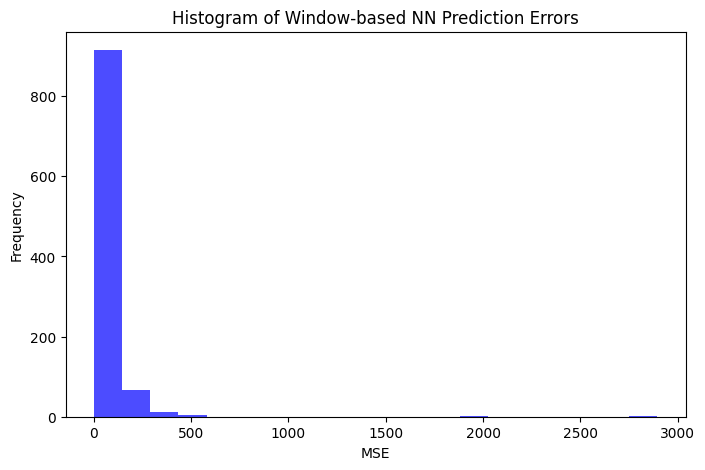

In [127]:
from tqdm.auto import tqdm
import numpy as np

window_size = 20
top_N_neighbors = 5
num_queries = 1_000

mse_windowed = []
mae_windowed = []

ray_cols = [f"ray_{i}" for i in range(100)]

# Random query indices avoiding the last part of dataset
query_indices = np.random.choice(range(len(data)-window_size-1), num_queries, replace=False)
counter_ = 0 

for query_idx in tqdm(query_indices, desc="Window NN Predictions"):
    # --- Extract query window ---
    query_window_indices = np.arange(query_idx, query_idx + window_size)
    query_window = lidars[query_window_indices]

    # --- Slide over all possible windows in dataset ---
    n_possible_windows = len(data) - window_size - 1
    dists = np.zeros(n_possible_windows)

    for i in range(n_possible_windows):
        candidate_window = lidars[i:i+window_size]
        # Distance: sum of squared differences
        dists[i] = np.sum((candidate_window - query_window)**2)

    # Get indices of top-N closest windows
    top_window_idx = np.argsort(dists)[:top_N_neighbors]

    # --- Predict next lidar reading using top neighbors ---
    neighbor_next_scans = []
    for win_idx in top_window_idx:
        last_reading_idx = win_idx + window_size - 1
        next_idx = last_reading_idx + 1
        if next_idx < len(data):
            neighbor_next_scans.append(lidars[next_idx])

    if len(neighbor_next_scans) > 0:
        pred = np.mean(neighbor_next_scans, axis=0)
        gt = lidars[query_idx + window_size]  # next reading after query window
        mse_windowed.append(((gt - pred)**2).mean())
        mae_windowed.append(np.abs(gt - pred).mean())

    print(counter_, f"Window NN Prediction: MSE={np.mean(mse_windowed):.4f}, MAE={np.mean(mae_windowed):.4f}")
    counter_+=1 
# --- Report results ---
print(f"Window NN Prediction: MSE={np.mean(mse_windowed):.4f}, MAE={np.mean(mae_windowed):.4f}")

# Optional: plot histogram of errors
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(mse_windowed, bins=20, alpha=0.7, color='blue')
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.title("Histogram of Window-based NN Prediction Errors")
plt.show()
